# Data analysis of the imdb database

The dataset can be obtained from https://www.kaggle.com/karrrimba/movie-metadatacsv

We will use the pandas library for Python. Some tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading csv data
data = pd.read_csv("./Data/movie_metadata.csv")

In [5]:
data #.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
# Rapid description of the data
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# Dropping data lines with NaN
data.dropna(how='any',inplace=True)
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


## Plotting data

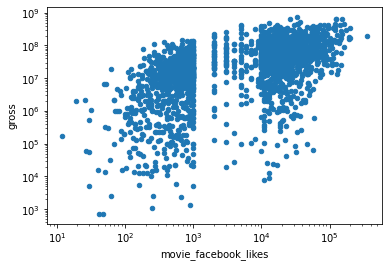

In [8]:
data_sample = data[data.movie_facebook_likes > 0]
data_sample.plot.scatter("movie_facebook_likes","gross", logx=True, logy=True)
plt.show()

### Question 1
Plot different variables and see whether you can spot some correlations. 

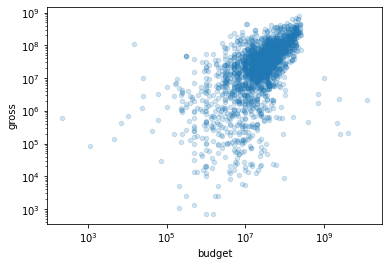

In [9]:
data_sample = data[data.movie_facebook_likes > 0]
data_sample.plot.scatter("budget","gross", logx=True, logy=True, alpha=0.2)
plt.show()

## Gradient descent algorithm

We want to find a linear regression between x = log(budget) and y = log(gross).

The linear regression consists in the hypothesis

$h_\theta (x) = \theta_0 + \theta_1 x$

with the cost function

$J(\theta_0, \theta_1) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$

The iterative procedure of the gradient descent algorithm is then 

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

with $\alpha$ the learning parameter and 

$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)$

$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x^{(i)}$

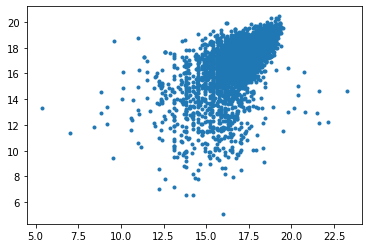

[19.2835707  19.51929303 19.31676877 19.33697148 19.39032265 19.36847014
 19.37619219 19.33697148 19.33697148 19.33697148]


In [10]:
x = np.log(np.array(data["budget"]))
y = np.log(np.array(data["gross"]))
plt.plot(x,y,'.')
plt.show()
print(x[:10])

### Question 2
- Complete the following code to implement a gradient descent algorithm
- Check how the convergence varies with $\alpha$ (a plot of J as a function of t may help)

In [48]:
T = 10000  # number of steps
alpha = 0.003  # learning parameter
theta0 = 3.0  # initial value
theta1 = 1.0  # initial value
N = len(x)
Jtable = []

for t in range(T):
    J = 0
    dJ0 = 0
    dJ1 = 0
    for i in range(N):
        h_minus_y = theta0 + theta1 * x[i] - y[i]
        J += h_minus_y**2 / (2 * N)
        dJ0 += h_minus_y /N
        dJ1 += h_minus_y * x[i] /N
    theta0 -= alpha * dJ0
    theta1 -= alpha * dJ1
    Jtable.append(J)
    print('t', t, '  J', J,  'theta0, theta1', theta0, theta1)
plt.plot(Jtable)
plt.show()

t 0   J 6.392788137893269 theta0, theta1 2.990638147927358 0.8413262653080315
t 1   J 1.5767651547784807 theta0, theta1 2.98930214299741 0.8185207766122257
t 2   J 1.477285096513098 theta0, theta1 2.9891196297180036 0.8152425619630648
t 3   J 1.4752301909996535 theta0, theta1 2.989102898503508 0.8147708487916623
t 4   J 1.4751877044439925 theta0, theta1 2.989109993626133 0.8147024920097876
t 5   J 1.4751867865194437 theta0, theta1 2.9891205129059855 0.8146921064810004
t 6   J 1.475186727240496 theta0, theta1 2.989131524098271 0.8146900527170075
t 7   J 1.4751866856995979 theta0, theta1 2.9891426057745205 0.814689196424702
t 8   J 1.4751866445269195 theta0, theta1 2.9891536973661403 0.8146885122482653
t 9   J 1.4751866033636694 theta0, theta1 2.989164790168088 0.8146878528213727
t 10   J 1.4751865622024343 theta0, theta1 2.9891758829292607 0.8146871969642213
t 11   J 1.4751865210430684 theta0, theta1 2.9891869754698526 0.8146865416328045
t 12   J 1.4751864798855656 theta0, theta1 2.9891

t 112   J 1.4751823735177938 theta0, theta1 2.9903060319099284 0.8146204380475968
t 113   J 1.4751823325478026 theta0, theta1 2.990317098907669 0.814619784311072
t 114   J 1.4751822915796577 theta0, theta1 2.990328165655231 0.8146191305893253
t 115   J 1.4751822506133723 theta0, theta1 2.9903392321526208 0.8146184768823566
t 116   J 1.4751822096489333 theta0, theta1 2.9903502983998433 0.8146178231901654
t 117   J 1.4751821686863518 theta0, theta1 2.9903613643969047 0.8146171695127514
t 118   J 1.4751821277256179 theta0, theta1 2.99037243014381 0.8146165158501143
t 119   J 1.4751820867667367 theta0, theta1 2.990383495640566 0.8146158622022538
t 120   J 1.475182045809711 theta0, theta1 2.9903945608871774 0.8146152085691696
t 121   J 1.475182004854535 theta0, theta1 2.9904056258836498 0.8146145549508612
t 122   J 1.4751819639012078 theta0, theta1 2.9904166906299894 0.8146139013473285
t 123   J 1.475181922949738 theta0, theta1 2.9904277551262015 0.8146132477585708
t 124   J 1.4751818820001

t 245   J 1.4751769407361772 theta0, theta1 2.9917757487105794 0.8145336206851697
t 246   J 1.475176900011806 theta0, theta1 2.991786782484202 0.8145329689112203
t 247   J 1.4751768592892782 theta0, theta1 2.991797816008398 0.8145323171520049
t 248   J 1.4751768185685896 theta0, theta1 2.9918088492831716 0.814531665407523
t 249   J 1.4751767778497444 theta0, theta1 2.99181988230853 0.8145310136777743
t 250   J 1.4751767371327371 theta0, theta1 2.9918309150844773 0.8145303619627584
t 251   J 1.4751766964175719 theta0, theta1 2.9918419476110203 0.8145297102624751
t 252   J 1.4751766557042474 theta0, theta1 2.991852979888164 0.8145290585769239
t 253   J 1.4751766149927614 theta0, theta1 2.9918640119159146 0.8145284069061047
t 254   J 1.4751765742831149 theta0, theta1 2.9918750436942774 0.8145277552500171
t 255   J 1.4751765335753133 theta0, theta1 2.991886075223258 0.8145271036086605
t 256   J 1.475176492869352 theta0, theta1 2.991897106502862 0.8145264519820349
t 257   J 1.47517645216523

t 361   J 1.4751722289688496 theta0, theta1 2.9930540041994096 0.814458113097586
t 362   J 1.4751721884574995 theta0, theta1 2.99306500907705 0.8144574630305458
t 363   J 1.4751721479479896 theta0, theta1 2.9930760137059162 0.8144568129782008
t 364   J 1.4751721074403048 theta0, theta1 2.993087018086014 0.8144561629405509
t 365   J 1.4751720669344517 theta0, theta1 2.993098022217349 0.8144555129175955
t 366   J 1.475172026430433 theta0, theta1 2.993109026099927 0.8144548629093344
t 367   J 1.475171985928242 theta0, theta1 2.993120029733754 0.8144542129157673
t 368   J 1.4751719454278864 theta0, theta1 2.9931310331188348 0.8144535629368937
t 369   J 1.4751719049293537 theta0, theta1 2.993142036255175 0.8144529129727135
t 370   J 1.4751718644326604 theta0, theta1 2.993153039142781 0.8144522630232263
t 371   J 1.4751718239377924 theta0, theta1 2.993164041781658 0.8144516130884316
t 372   J 1.4751717834447602 theta0, theta1 2.993175044171811 0.8144509631683292
t 373   J 1.475171742953559 t

t 491   J 1.4751669778218437 theta0, theta1 2.9944825543330484 0.8143737274835394
t 492   J 1.4751669375479064 theta0, theta1 2.9944935269171764 0.8143730793241032
t 493   J 1.4751668972757932 theta0, theta1 2.9945044992532606 0.8143724311793191
t 494   J 1.4751668570054957 theta0, theta1 2.9945154713413062 0.8143717830491868
t 495   J 1.4751668167370193 theta0, theta1 2.994526443181319 0.8143711349337059
t 496   J 1.4751667764703684 theta0, theta1 2.994537414773305 0.8143704868328763
t 497   J 1.475166736205538 theta0, theta1 2.994548386117269 0.8143698387466975
t 498   J 1.4751666959425231 theta0, theta1 2.994559357213217 0.8143691906751692
t 499   J 1.4751666556813317 theta0, theta1 2.9945703280611546 0.8143685426182911
t 500   J 1.4751666154219563 theta0, theta1 2.9945812986610876 0.8143678945760628
t 501   J 1.4751665751644052 theta0, theta1 2.9945922690130216 0.814367246548484
t 502   J 1.4751665349086722 theta0, theta1 2.994603239116962 0.8143665985355545
t 503   J 1.47516649465

t 593   J 1.4751628792452665 theta0, theta1 2.9956004812017043 0.8143076906374749
t 594   J 1.475162839156635 theta0, theta1 2.9956114285142057 0.814307043970854
t 595   J 1.4751627990698133 theta0, theta1 2.9956223755792344 0.8143063973188516
t 596   J 1.4751627589848029 theta0, theta1 2.995633322396796 0.8143057506814673
t 597   J 1.475162718901602 theta0, theta1 2.9956442689668963 0.8143051040587007
t 598   J 1.4751626788202143 theta0, theta1 2.9956552152895406 0.8143044574505516
t 599   J 1.4751626387406434 theta0, theta1 2.9956661613647344 0.8143038108570194
t 600   J 1.4751625986628838 theta0, theta1 2.9956771071924835 0.8143031642781042
t 601   J 1.4751625585869337 theta0, theta1 2.9956880527727936 0.8143025177138054
t 602   J 1.4751625185127957 theta0, theta1 2.99569899810567 0.8143018711641226
t 603   J 1.475162478440464 theta0, theta1 2.9957099431911187 0.8143012246290555
t 604   J 1.4751624383699484 theta0, theta1 2.995720888029145 0.814300578108604
t 605   J 1.4751623983012

t 710   J 1.475158201152909 theta0, theta1 2.9968796388688945 0.8142321297574844
t 711   J 1.4751581612757765 theta0, theta1 2.996890557265019 0.8142314847989773
t 712   J 1.4751581214004459 theta0, theta1 2.9969014754143246 0.8142308398550502
t 713   J 1.4751580815269176 theta0, theta1 2.996912393316817 0.8142301949257024
t 714   J 1.4751580416551877 theta0, theta1 2.9969233109725013 0.8142295500109338
t 715   J 1.4751580017852666 theta0, theta1 2.9969342283813836 0.8142289051107441
t 716   J 1.4751579619171462 theta0, theta1 2.996945145543469 0.8142282602251327
t 717   J 1.4751579220508282 theta0, theta1 2.9969560624587634 0.8142276153540996
t 718   J 1.4751578821863123 theta0, theta1 2.996966979127272 0.8142269704976443
t 719   J 1.4751578423236014 theta0, theta1 2.996977895549001 0.8142263256557664
t 720   J 1.4751578024626877 theta0, theta1 2.996988811723955 0.8142256808284657
t 721   J 1.475157762603582 theta0, theta1 2.9969997276521405 0.8142250360157418
t 722   J 1.475157722746

t 827   J 1.4751535477414552 theta0, theta1 2.998155417752007 0.8141567684650075
t 828   J 1.475153508074709 theta0, theta1 2.998166307308135 0.8141561252101024
t 829   J 1.4751534684097554 theta0, theta1 2.9981771966180957 0.8141554819697386
t 830   J 1.4751534287465926 theta0, theta1 2.998188085681895 0.8141548387439159
t 831   J 1.475153389085229 theta0, theta1 2.9981989744995388 0.8141541955326338
t 832   J 1.4751533494256466 theta0, theta1 2.9982098630710317 0.8141535523358919
t 833   J 1.4751533097678668 theta0, theta1 2.9982207513963797 0.81415290915369
t 834   J 1.4751532701118766 theta0, theta1 2.9982316394755886 0.8141522659860277
t 835   J 1.47515323045768 theta0, theta1 2.9982425273086637 0.8141516228329049
t 836   J 1.4751531908052755 theta0, theta1 2.998253414895611 0.8141509796943209
t 837   J 1.4751531511546672 theta0, theta1 2.9982643022364353 0.8141503365702757
t 838   J 1.4751531115058487 theta0, theta1 2.998275189331143 0.8141496934607687
t 839   J 1.475153071858823

t 945   J 1.4751488794232293 theta0, theta1 2.9994386875681167 0.814080964677048
t 946   J 1.4751488399675416 theta0, theta1 2.9994495481149093 0.8140803231357479
t 947   J 1.4751488005136386 theta0, theta1 2.9994604084161907 0.8140796816089504
t 948   J 1.4751487610615186 theta0, theta1 2.999471268471966 0.814079040096655
t 949   J 1.4751487216111787 theta0, theta1 2.9994821282822417 0.8140783985988617
t 950   J 1.4751486821626254 theta0, theta1 2.9994929878470225 0.8140777571155697
t 951   J 1.475148642715856 theta0, theta1 2.9995038471663142 0.8140771156467791
t 952   J 1.4751486032708723 theta0, theta1 2.9995147062401224 0.8140764741924895
t 953   J 1.475148563827665 theta0, theta1 2.9995255650684527 0.8140758327527003
t 954   J 1.4751485243862457 theta0, theta1 2.9995364236513105 0.8140751913274115
t 955   J 1.4751484849466079 theta0, theta1 2.999547281988701 0.8140745499166225
t 956   J 1.4751484455087571 theta0, theta1 2.9995581400806306 0.8140739085203332
t 957   J 1.4751484060

t 1046   J 1.4751449033936304 theta0, theta1 3.0005343638864956 0.8140162421890194
t 1047   J 1.4751448641177003 theta0, theta1 3.0005451996646535 0.8140156021108227
t 1048   J 1.4751448248435464 theta0, theta1 3.0005560351978597 0.8140149620470953
t 1049   J 1.4751447855711746 theta0, theta1 3.00056687048612 0.8140143219978372
t 1050   J 1.475144746300574 theta0, theta1 3.0005777055294405 0.8140136819630479
t 1051   J 1.4751447070317465 theta0, theta1 3.000588540327826 0.8140130419427272
t 1052   J 1.475144667764695 theta0, theta1 3.0005993748812823 0.8140124019368745
t 1053   J 1.4751446284994243 theta0, theta1 3.000610209189815 0.8140117619454896
t 1054   J 1.4751445892359216 theta0, theta1 3.000621043253429 0.8140111219685724
t 1055   J 1.4751445499741969 theta0, theta1 3.0006318770721307 0.8140104820061222
t 1056   J 1.4751445107142451 theta0, theta1 3.0006427106459252 0.814009842058139
t 1057   J 1.4751444714560749 theta0, theta1 3.0006535439748183 0.8140092021246224
t 1058   J 1

t 1158   J 1.4751405155092219 theta0, theta1 3.0017464496836284 0.8139446432987462
t 1159   J 1.4751404764316753 theta0, theta1 3.0017572580616223 0.8139440048390993
t 1160   J 1.475140437355895 theta0, theta1 3.001768066195284 0.8139433663938853
t 1161   J 1.475140398281885 theta0, theta1 3.0017788740846196 0.8139427279631039
t 1162   J 1.4751403592096317 theta0, theta1 3.001789681729634 0.8139420895467547
t 1163   J 1.475140320139155 theta0, theta1 3.0018004891303334 0.8139414511448374
t 1164   J 1.4751402810704435 theta0, theta1 3.0018112962867227 0.8139408127573518
t 1165   J 1.475140242003495 theta0, theta1 3.0018221031988075 0.8139401743842973
t 1166   J 1.4751402029383127 theta0, theta1 3.0018329098665935 0.8139395360256738
t 1167   J 1.4751401638748962 theta0, theta1 3.001843716290086 0.8139388976814809
t 1168   J 1.475140124813249 theta0, theta1 3.0018545224692907 0.8139382593517183
t 1169   J 1.4751400857533665 theta0, theta1 3.001865328404213 0.8139376210363856
t 1170   J 1.

t 1290   J 1.4751353725183622 theta0, theta1 3.0031710451523383 0.8138604912899616
t 1291   J 1.4751353336733357 theta0, theta1 3.0031818213262182 0.813859854732638
t 1292   J 1.4751352948300667 theta0, theta1 3.003192597256494 0.8138592181897041
t 1293   J 1.4751352559885524 theta0, theta1 3.003203372943171 0.8138585816611598
t 1294   J 1.4751352171487901 theta0, theta1 3.0032141483862556 0.8138579451470047
t 1295   J 1.47513517831079 theta0, theta1 3.003224923585752 0.8138573086472386
t 1296   J 1.4751351394745456 theta0, theta1 3.0032356985416673 0.813856672161861
t 1297   J 1.4751351006400575 theta0, theta1 3.0032464732540056 0.8138560356908716
t 1298   J 1.475135061807322 theta0, theta1 3.003257247722773 0.8138553992342702
t 1299   J 1.4751350229763396 theta0, theta1 3.0032680219479753 0.8138547627920565
t 1300   J 1.4751349841471169 theta0, theta1 3.003278795929617 0.8138541263642299
t 1301   J 1.4751349453196492 theta0, theta1 3.003289569667705 0.8138534899507904
t 1302   J 1.47

t 1393   J 1.4751313806920356 theta0, theta1 3.004279712383564 0.8137950014181838
t 1394   J 1.4751313420274799 theta0, theta1 3.004290463495139 0.8137943663413107
t 1395   J 1.4751313033646778 theta0, theta1 3.0043012143636765 0.8137937312787941
t 1396   J 1.4751312647036237 theta0, theta1 3.004311964989182 0.8137930962306335
t 1397   J 1.4751312260443168 theta0, theta1 3.0043227153716607 0.8137924611968287
t 1398   J 1.4751311873867545 theta0, theta1 3.004333465511119 0.8137918261773793
t 1399   J 1.47513114873094 theta0, theta1 3.0043442154075617 0.813791191172285
t 1400   J 1.4751311100768767 theta0, theta1 3.0043549650609944 0.8137905561815456
t 1401   J 1.4751310714245636 theta0, theta1 3.0043657144714224 0.8137899212051606
t 1402   J 1.47513103277399 theta0, theta1 3.0043764636388515 0.8137892862431297
t 1403   J 1.475130994125169 theta0, theta1 3.0043872125632873 0.8137886512954527
t 1404   J 1.475130955478097 theta0, theta1 3.004397961244735 0.8137880163621293
t 1405   J 1.475

t 1494   J 1.4751274843868645 theta0, theta1 3.005364348228671 0.8137309310998583
t 1495   J 1.4751274458984662 theta0, theta1 3.0053750748211896 0.8137302974713457
t 1496   J 1.4751274074118104 theta0, theta1 3.005385801171225 0.8137296638571568
t 1497   J 1.4751273689268989 theta0, theta1 3.0053965272787826 0.8137290302572913
t 1498   J 1.475127330443724 theta0, theta1 3.005407253143868 0.8137283966717487
t 1499   J 1.4751272919622864 theta0, theta1 3.005417978766487 0.813727763100529
t 1500   J 1.47512725348259 theta0, theta1 3.0054287041466448 0.8137271295436316
t 1501   J 1.4751272150046308 theta0, theta1 3.0054394292843467 0.8137264960010562
t 1502   J 1.4751271765284177 theta0, theta1 3.005450154179598 0.8137258624728025
t 1503   J 1.4751271380539412 theta0, theta1 3.005460878832405 0.8137252289588703
t 1504   J 1.4751270995812025 theta0, theta1 3.005471603242772 0.8137245954592592
t 1505   J 1.4751270611102067 theta0, theta1 3.005482327410706 0.8137239619739688
t 1506   J 1.475

t 1620   J 1.4751226485267233 theta0, theta1 3.006713991114129 0.8136512066009057
t 1621   J 1.475122610256963 theta0, theta1 3.006724687196896 0.8136505747746289
t 1622   J 1.4751225719889298 theta0, theta1 3.00673538303787 0.8136499429626349
t 1623   J 1.4751225337226348 theta0, theta1 3.0067460786370557 0.8136493111649237
t 1624   J 1.475122495458057 theta0, theta1 3.006756773994459 0.8136486793814947
t 1625   J 1.475122457195221 theta0, theta1 3.006767469110085 0.8136480476123477
t 1626   J 1.475122418934107 theta0, theta1 3.0067781639839395 0.8136474158574823
t 1627   J 1.4751223806747265 theta0, theta1 3.006788858616028 0.8136467841168983
t 1628   J 1.4751223424170754 theta0, theta1 3.006799553006356 0.8136461523905952
t 1629   J 1.4751223041611519 theta0, theta1 3.0068102471549283 0.8136455206785728
t 1630   J 1.4751222659069614 theta0, theta1 3.006820941061751 0.8136448889808308
t 1631   J 1.475122227654498 theta0, theta1 3.00683163472683 0.8136442572973688
t 1632   J 1.4751221

t 1756   J 1.4751174596905494 theta0, theta1 3.0081664409460678 0.813565409212313
t 1757   J 1.4751174216553822 theta0, theta1 3.0081771041950507 0.8135647793255544
t 1758   J 1.4751173836219302 theta0, theta1 3.0081877672029824 0.8135641494530349
t 1759   J 1.4751173455902062 theta0, theta1 3.0081984299698683 0.8135635195947541
t 1760   J 1.4751173075601915 theta0, theta1 3.008209092495714 0.8135628897507119
t 1761   J 1.4751172695319041 theta0, theta1 3.008219754780525 0.8135622599209077
t 1762   J 1.4751172315053296 theta0, theta1 3.008230416824307 0.8135616301053413
t 1763   J 1.4751171934804799 theta0, theta1 3.0082410786270644 0.8135610003040125
t 1764   J 1.4751171554573466 theta0, theta1 3.008251740188803 0.8135603705169208
t 1765   J 1.4751171174359292 theta0, theta1 3.008262401509529 0.8135597407440659
t 1766   J 1.4751170794162394 theta0, theta1 3.008273062589247 0.8135591109854475
t 1767   J 1.4751170413982637 theta0, theta1 3.008283723427963 0.8135584812410653
t 1768   J 1

t 1879   J 1.475112794243574 theta0, theta1 3.0094762136115403 0.8134880398795645
t 1880   J 1.475112756419337 theta0, theta1 3.00948684725207 0.8134874117418013
t 1881   J 1.4751127185968114 theta0, theta1 3.009497480652218 0.8134867836182376
t 1882   J 1.4751126807759871 theta0, theta1 3.0095081138119895 0.813486155508873
t 1883   J 1.475112642956881 theta0, theta1 3.00951874673139 0.8134855274137075
t 1884   J 1.4751126051394798 theta0, theta1 3.009529379410425 0.8134848993327405
t 1885   J 1.4751125673237924 theta0, theta1 3.0095400118491 0.8134842712659719
t 1886   J 1.475112529509815 theta0, theta1 3.00955064404742 0.813483643213401
t 1887   J 1.475112491697546 theta0, theta1 3.0095612760053903 0.813483015175028
t 1888   J 1.4751124538869864 theta0, theta1 3.009571907723017 0.8134823871508522
t 1889   J 1.4751124160781324 theta0, theta1 3.0095825392003053 0.8134817591408733
t 1890   J 1.4751123782709927 theta0, theta1 3.0095931704372605 0.8134811311450911
t 1891   J 1.47511234046

t 2000   J 1.4751082299036156 theta0, theta1 3.0107611405068684 0.8134121382065927
t 2001   J 1.4751081922857363 theta0, theta1 3.0107717451006035 0.8134115117846472
t 2002   J 1.4751081546695604 theta0, theta1 3.010782349454613 0.8134108853768625
t 2003   J 1.4751081170550797 theta0, theta1 3.010792953568903 0.8134102589832382
t 2004   J 1.475108079442305 theta0, theta1 3.010803557443478 0.8134096326037739
t 2005   J 1.4751080418312237 theta0, theta1 3.0108141610783448 0.8134090062384695
t 2006   J 1.4751080042218507 theta0, theta1 3.0108247644735076 0.8134083798873246
t 2007   J 1.4751079666141735 theta0, theta1 3.0108353676289723 0.8134077535503388
t 2008   J 1.4751079290081974 theta0, theta1 3.0108459705447443 0.8134071272275119
t 2009   J 1.4751078914039186 theta0, theta1 3.010856573220829 0.8134065009188435
t 2010   J 1.475107853801343 theta0, theta1 3.0108671756572316 0.8134058746243332
t 2011   J 1.4751078162004667 theta0, theta1 3.0108777778539575 0.813405248343981
t 2012   J 

t 2151   J 1.475102568821525 theta0, theta1 3.012359722317671 0.8133177086835878
t 2152   J 1.4751025314595858 theta0, theta1 3.012370290774192 0.8133170843962967
t 2153   J 1.4751024940993402 theta0, theta1 3.012380858991805 0.8133164601231182
t 2154   J 1.4751024567407836 theta0, theta1 3.012391426970515 0.8133158358640519
t 2155   J 1.475102419383913 theta0, theta1 3.012401994710327 0.8133152116190974
t 2156   J 1.4751023820287357 theta0, theta1 3.012412562211247 0.8133145873882545
t 2157   J 1.4751023446752434 theta0, theta1 3.0124231294732806 0.8133139631715227
t 2158   J 1.4751023073234435 theta0, theta1 3.0124336964964327 0.813313338968902
t 2159   J 1.475102269973329 theta0, theta1 3.0124442632807087 0.8133127147803918
t 2160   J 1.4751022326248997 theta0, theta1 3.012454829826114 0.8133120906059919
t 2161   J 1.4751021952781673 theta0, theta1 3.0124653961326544 0.813311466445702
t 2162   J 1.4751021579331183 theta0, theta1 3.0124759622003348 0.8133108422995217
t 2163   J 1.475

t 2251   J 1.4750988409769816 theta0, theta1 3.0134153862461828 0.8132553497598535
t 2252   J 1.4750988037835842 theta0, theta1 3.0134259308385807 0.8132547268822354
t 2253   J 1.4750987665918704 theta0, theta1 3.0134364751926097 0.8132541040186981
t 2254   J 1.475098729401833 theta0, theta1 3.0134470193082756 0.8132534811692411
t 2255   J 1.4750986922134843 theta0, theta1 3.0134575631855833 0.8132528583338642
t 2256   J 1.4750986550268117 theta0, theta1 3.013468106824538 0.8132522355125669
t 2257   J 1.4750986178418235 theta0, theta1 3.013478650225146 0.813251612705349
t 2258   J 1.4750985806585157 theta0, theta1 3.0134891933874113 0.81325098991221
t 2259   J 1.4750985434768906 theta0, theta1 3.0134997363113403 0.8132503671331499
t 2260   J 1.47509850629694 theta0, theta1 3.013510278996938 0.8132497443681682
t 2261   J 1.4750984691186773 theta0, theta1 3.01352082144421 0.8132491216172646
t 2262   J 1.4750984319420934 theta0, theta1 3.0135313636531618 0.8132484988804387
t 2263   J 1.47

t 2360   J 1.475094796778467 theta0, theta1 3.014563344908781 0.8131875389113838
t 2361   J 1.475094759767911 theta0, theta1 3.0145738635506603 0.813186917566684
t 2362   J 1.4750947227590352 theta0, theta1 3.0145843819547573 0.8131862962360302
t 2363   J 1.4750946857518281 theta0, theta1 3.0145949001210774 0.8131856749194221
t 2364   J 1.4750946487462933 theta0, theta1 3.014605418049626 0.8131850536168593
t 2365   J 1.4750946117424313 theta0, theta1 3.0146159357404083 0.8131844323283416
t 2366   J 1.4750945747402433 theta0, theta1 3.0146264531934297 0.8131838110538686
t 2367   J 1.4750945377397287 theta0, theta1 3.014636970408696 0.8131831897934401
t 2368   J 1.4750945007408858 theta0, theta1 3.014647487386212 0.8131825685470555
t 2369   J 1.4750944637437124 theta0, theta1 3.0146580041259834 0.8131819473147148
t 2370   J 1.4750944267482198 theta0, theta1 3.0146685206280157 0.8131813260964175
t 2371   J 1.4750943897543922 theta0, theta1 3.014679036892314 0.8131807048921633
t 2372   J 1

t 2484   J 1.4750902202068645 theta0, theta1 3.015865844840071 0.8131105991849372
t 2485   J 1.4750901834032246 theta0, theta1 3.0158763340379027 0.8131099795795211
t 2486   J 1.4750901466012432 theta0, theta1 3.0158868229986178 0.8131093599881117
t 2487   J 1.4750901098009335 theta0, theta1 3.0158973117222216 0.8131087404107087
t 2488   J 1.4750900730022798 theta0, theta1 3.0159078002087196 0.8131081208473118
t 2489   J 1.4750900362052908 theta0, theta1 3.015918288458117 0.8131075012979205
t 2490   J 1.4750899994099755 theta0, theta1 3.0159287764704192 0.8131068817625347
t 2491   J 1.4750899626163094 theta0, theta1 3.0159392642456315 0.8131062622411539
t 2492   J 1.4750899258243166 theta0, theta1 3.0159497517837592 0.813105642733778
t 2493   J 1.475089889033983 theta0, theta1 3.0159602390848077 0.8131050232404065
t 2494   J 1.4750898522453157 theta0, theta1 3.0159707261487827 0.813104403761039
t 2495   J 1.4750898154583065 theta0, theta1 3.015981212975689 0.8131037842956754
t 2496   J

t 2590   J 1.4750863282661077 theta0, theta1 3.0169763812895045 0.8130449988969249
t 2591   J 1.475086291638418 theta0, theta1 3.0169868453827764 0.8130443807744556
t 2592   J 1.475086255012396 theta0, theta1 3.016997309239499 0.8130437626659595
t 2593   J 1.475086218388021 theta0, theta1 3.0170077728596776 0.8130431445714361
t 2594   J 1.4750861817653067 theta0, theta1 3.017018236243318 0.8130425264908853
t 2595   J 1.4750861451442432 theta0, theta1 3.0170286993904254 0.8130419084243067
t 2596   J 1.475086108524843 theta0, theta1 3.0170391623010047 0.8130412903716999
t 2597   J 1.475086071907093 theta0, theta1 3.0170496249750616 0.8130406723330648
t 2598   J 1.4750860352910036 theta0, theta1 3.0170600874126015 0.8130400543084008
t 2599   J 1.4750859986765688 theta0, theta1 3.0170705496136296 0.8130394362977078
t 2600   J 1.4750859620637846 theta0, theta1 3.0170810115781515 0.8130388183009855
t 2601   J 1.4750859254526543 theta0, theta1 3.0170914733061722 0.8130382003182334
t 2602   J 

t 2714   J 1.4750817990386893 theta0, theta1 3.018272126588568 0.8129684581720776
t 2715   J 1.4750817626157806 theta0, theta1 3.0182825613904862 0.8129678417798724
t 2716   J 1.4750817261945146 theta0, theta1 3.0182929959565175 0.812967225401601
t 2717   J 1.4750816897748948 theta0, theta1 3.018303430286667 0.8129666090372635
t 2718   J 1.4750816533569242 theta0, theta1 3.0183138643809406 0.8129659926868592
t 2719   J 1.475081616940595 theta0, theta1 3.018324298239343 0.8129653763503881
t 2720   J 1.4750815805259199 theta0, theta1 3.0183347318618794 0.8129647600278498
t 2721   J 1.475081544112886 theta0, theta1 3.018345165248556 0.812964143719244
t 2722   J 1.4750815077015011 theta0, theta1 3.018355598399377 0.8129635274245702
t 2723   J 1.4750814712917606 theta0, theta1 3.0183660313143483 0.8129629111438283
t 2724   J 1.4750814348836638 theta0, theta1 3.0183764639934756 0.812962294877018
t 2725   J 1.4750813984772198 theta0, theta1 3.018386896436764 0.8129616786241388
t 2726   J 1.47

t 2851   J 1.4750768244094414 theta0, theta1 3.019699499161845 0.812884142117476
t 2852   J 1.475076788211437 theta0, theta1 3.0197099016968703 0.8128835276313021
t 2853   J 1.4750767520150685 theta0, theta1 3.0197203039967384 0.8128829131590192
t 2854   J 1.4750767158203382 theta0, theta1 3.019730706061454 0.8128822987006269
t 2855   J 1.475076679627246 theta0, theta1 3.019741107891023 0.812881684256125
t 2856   J 1.4750766434357838 theta0, theta1 3.01975150948545 0.812881069825513
t 2857   J 1.4750766072459691 theta0, theta1 3.019761910844741 0.8128804554087908
t 2858   J 1.4750765710577765 theta0, theta1 3.0197723119689006 0.8128798410059579
t 2859   J 1.4750765348712311 theta0, theta1 3.0197827128579346 0.8128792266170141
t 2860   J 1.4750764986863198 theta0, theta1 3.0197931135118483 0.8128786122419591
t 2861   J 1.475076462503042 theta0, theta1 3.019803513930647 0.8128779978807925
t 2862   J 1.4750764263213985 theta0, theta1 3.019813914114336 0.812877383533514
t 2863   J 1.475076

t 2963   J 1.4750727803890051 theta0, theta1 3.020863122556039 0.8128154059406167
t 2964   J 1.475072744373838 theta0, theta1 3.0208734987864316 0.8128147930082789
t 2965   J 1.4750727083602946 theta0, theta1 3.0208838747822617 0.8128141800897968
t 2966   J 1.4750726723483834 theta0, theta1 3.020894250543534 0.8128135671851703
t 2967   J 1.4750726363381 theta0, theta1 3.020904626070254 0.8128129542943989
t 2968   J 1.4750726003294403 theta0, theta1 3.020915001362427 0.8128123414174825
t 2969   J 1.4750725643224143 theta0, theta1 3.0209253764200583 0.8128117285544205
t 2970   J 1.475072528317015 theta0, theta1 3.020935751243153 0.8128111157052128
t 2971   J 1.4750724923132388 theta0, theta1 3.020946125831717 0.8128105028698591
t 2972   J 1.4750724563110964 theta0, theta1 3.0209565001857546 0.8128098900483591
t 2973   J 1.4750724203105814 theta0, theta1 3.0209668743052718 0.8128092772407124
t 2974   J 1.4750723843116869 theta0, theta1 3.020977248190274 0.8128086644469187
t 2975   J 1.475

t 3099   J 1.4750678972435416 theta0, theta1 3.022272138774237 0.8127321742107849
t 3100   J 1.4750678614491455 theta0, theta1 3.022282483152697 0.8127315631599665
t 3101   J 1.4750678256563672 theta0, theta1 3.0222928272973144 0.8127309521229614
t 3102   J 1.475067789865204 theta0, theta1 3.022303171208094 0.8127303410997693
t 3103   J 1.4750677540756612 theta0, theta1 3.0223135148850413 0.8127297300903898
t 3104   J 1.4750677182877385 theta0, theta1 3.0223238583281615 0.8127291190948227
t 3105   J 1.4750676825014328 theta0, theta1 3.02233420153746 0.8127285081130676
t 3106   J 1.4750676467167438 theta0, theta1 3.0223445445129418 0.8127278971451243
t 3107   J 1.4750676109336776 theta0, theta1 3.0223548872546124 0.8127272861909923
t 3108   J 1.475067575152224 theta0, theta1 3.0223652297624772 0.8127266752506715
t 3109   J 1.4750675393723853 theta0, theta1 3.0223755720365415 0.8127260643241615
t 3110   J 1.4750675035941707 theta0, theta1 3.0223859140768106 0.812725453411462
t 3111   J 1

t 3205   J 1.475064112029251 theta0, theta1 3.0233673425744585 0.8126674796347868
t 3206   J 1.475064076405987 theta0, theta1 3.023377662194965 0.8126668700464408
t 3207   J 1.4750640407843347 theta0, theta1 3.0233879815821885 0.8126662604718751
t 3208   J 1.4750640051642976 theta0, theta1 3.023398300736134 0.8126656509110891
t 3209   J 1.4750639695458616 theta0, theta1 3.023408619656807 0.8126650413640828
t 3210   J 1.4750639339290414 theta0, theta1 3.0234189383442125 0.8126644318308558
t 3211   J 1.4750638983138302 theta0, theta1 3.023429256798356 0.8126638223114079
t 3212   J 1.47506386270023 theta0, theta1 3.0234395750192427 0.8126632128057385
t 3213   J 1.475063827088235 theta0, theta1 3.0234498930068776 0.8126626033138475
t 3214   J 1.475063791477856 theta0, theta1 3.0234602107612663 0.8126619938357346
t 3215   J 1.475063755869085 theta0, theta1 3.023470528282414 0.8126613843713995
t 3216   J 1.4750637202619286 theta0, theta1 3.0234808455703255 0.8126607749208417
t 3217   J 1.475

t 3321   J 1.4750599904547794 theta0, theta1 3.0245628638898645 0.8125968592218725
t 3322   J 1.4750599550178578 theta0, theta1 3.0245731564846605 0.8125962512299572
t 3323   J 1.4750599195825398 theta0, theta1 3.0245834488467844 0.8125956432517859
t 3324   J 1.4750598841488194 theta0, theta1 3.024593740976241 0.8125950352873584
t 3325   J 1.475059848716708 theta0, theta1 3.0246040328730364 0.8125944273366745
t 3326   J 1.4750598132861912 theta0, theta1 3.024614324537175 0.8125938193997337
t 3327   J 1.47505977785728 theta0, theta1 3.0246246159686625 0.812593211476536
t 3328   J 1.4750597424299694 theta0, theta1 3.0246349071675036 0.8125926035670807
t 3329   J 1.475059707004259 theta0, theta1 3.024645198133704 0.8125919956713679
t 3330   J 1.4750596715801545 theta0, theta1 3.0246554888672694 0.8125913877893969
t 3331   J 1.475059636157646 theta0, theta1 3.0246657793682044 0.8125907799211676
t 3332   J 1.4750596007367425 theta0, theta1 3.0246760696365143 0.8125901720666796
t 3333   J 1.

t 3432   J 1.4750560667214427 theta0, theta1 3.0257039226138596 0.8125294559583677
t 3433   J 1.475056031461919 theta0, theta1 3.0257141894141153 0.8125288494901567
t 3434   J 1.4750559962039844 theta0, theta1 3.025724455982282 0.8125282430356554
t 3435   J 1.4750559609476492 theta0, theta1 3.0257347223183646 0.8125276365948635
t 3436   J 1.4750559256929012 theta0, theta1 3.0257449884223684 0.8125270301677807
t 3437   J 1.4750558904397522 theta0, theta1 3.025755254294299 0.8125264237544065
t 3438   J 1.475055855188198 theta0, theta1 3.0257655199341613 0.8125258173547409
t 3439   J 1.475055819938235 theta0, theta1 3.0257757853419607 0.8125252109687835
t 3440   J 1.4750557846898624 theta0, theta1 3.0257860505177026 0.8125246045965339
t 3441   J 1.475055749443088 theta0, theta1 3.025796315461392 0.8125239982379917
t 3442   J 1.4750557141979088 theta0, theta1 3.025806580173034 0.8125233918931568
t 3443   J 1.4750556789543223 theta0, theta1 3.025816844652634 0.8125227855620288
t 3444   J 1.

t 3544   J 1.475052127547186 theta0, theta1 3.0268523627711743 0.812461616667615
t 3545   J 1.475052092465752 theta0, theta1 3.026862603610027 0.8124610117329651
t 3546   J 1.4750520573859085 theta0, theta1 3.026872844217377 0.8124604068119904
t 3547   J 1.4750520223076464 theta0, theta1 3.02688308459323 0.8124598019046901
t 3548   J 1.4750519872309704 theta0, theta1 3.026893324737591 0.8124591970110645
t 3549   J 1.4750519521558794 theta0, theta1 3.0269035646504654 0.8124585921311129
t 3550   J 1.4750519170823793 theta0, theta1 3.0269138043318584 0.8124579872648351
t 3551   J 1.4750518820104652 theta0, theta1 3.0269240437817753 0.8124573824122308
t 3552   J 1.475051846940135 theta0, theta1 3.0269342830002213 0.8124567775732996
t 3553   J 1.4750518118713936 theta0, theta1 3.0269445219872018 0.8124561727480413
t 3554   J 1.4750517768042302 theta0, theta1 3.0269547607427216 0.8124555679364556
t 3555   J 1.4750517417386566 theta0, theta1 3.026964999266786 0.8124549631385422
t 3556   J 1.4

t 3664   J 1.4750479290798062 theta0, theta1 3.0280796119756963 0.8123891220625794
t 3665   J 1.475047894188193 theta0, theta1 3.028089825071604 0.8123885187667278
t 3666   J 1.4750478592981526 theta0, theta1 3.0281000379366363 0.8123879154845141
t 3667   J 1.4750478244096952 theta0, theta1 3.0281102505707986 0.8123873122159381
t 3668   J 1.475047789522815 theta0, theta1 3.0281204629740963 0.8123867089609995
t 3669   J 1.475047754637506 theta0, theta1 3.0281306751465347 0.8123861057196979
t 3670   J 1.4750477197537812 theta0, theta1 3.0281408870881186 0.8123855024920331
t 3671   J 1.4750476848716292 theta0, theta1 3.0281510987988534 0.8123848992780048
t 3672   J 1.4750476499910568 theta0, theta1 3.0281613102787444 0.8123842960776125
t 3673   J 1.4750476151120622 theta0, theta1 3.028171521527797 0.8123836928908561
t 3674   J 1.4750475802346403 theta0, theta1 3.028181732546016 0.8123830897177352
t 3675   J 1.475047545358796 theta0, theta1 3.0281919433334066 0.8123824865582495
t 3676   J 

t 3770   J 1.4750442393336514 theta0, theta1 3.029160916327918 0.8123252485382383
t 3771   J 1.4750442046088552 theta0, theta1 3.0291711049800805 0.8123246466862984
t 3772   J 1.4750441698856287 theta0, theta1 3.02918129340192 0.812324044847964
t 3773   J 1.4750441351639687 theta0, theta1 3.0291914815934424 0.8123234430232347
t 3774   J 1.475044100443881 theta0, theta1 3.0292016695546526 0.81232284121211
t 3775   J 1.475044065725363 theta0, theta1 3.029211857285556 0.8123222394145897
t 3776   J 1.4750440310084192 theta0, theta1 3.0292220447861573 0.8123216376306736
t 3777   J 1.475043996293038 theta0, theta1 3.029232232056462 0.8123210358603611
t 3778   J 1.4750439615792308 theta0, theta1 3.0292424190964753 0.8123204341036523
t 3779   J 1.4750439268669906 theta0, theta1 3.0292526059062026 0.8123198323605466
t 3780   J 1.4750438921563223 theta0, theta1 3.029262792485649 0.8123192306310438
t 3781   J 1.4750438574472222 theta0, theta1 3.0292729788348196 0.8123186289151436
t 3782   J 1.475

t 3875   J 1.4750406017885769 theta0, theta1 3.0302294682190922 0.8122621283121054
t 3876   J 1.4750405672282372 theta0, theta1 3.0302396327157886 0.8122615278870486
t 3877   J 1.4750405326694607 theta0, theta1 3.0302497969827087 0.8122609274755649
t 3878   J 1.475040498112248 theta0, theta1 3.0302599610198575 0.8122603270776538
t 3879   J 1.4750404635565917 theta0, theta1 3.03027012482724 0.8122597266933154
t 3880   J 1.4750404290025063 theta0, theta1 3.0302802884048616 0.812259126322549
t 3881   J 1.475040394449978 theta0, theta1 3.0302904517527276 0.8122585259653545
t 3882   J 1.4750403598990114 theta0, theta1 3.0303006148708427 0.8122579256217315
t 3883   J 1.4750403253496078 theta0, theta1 3.0303107777592126 0.8122573252916798
t 3884   J 1.4750402908017624 theta0, theta1 3.0303209404178424 0.8122567249751991
t 3885   J 1.4750402562554867 theta0, theta1 3.0303311028467372 0.8122561246722889
t 3886   J 1.4750402217107652 theta0, theta1 3.030341265045902 0.8122555243829491
t 3887   J

t 3984   J 1.475036843893679 theta0, theta1 3.0313360469841295 0.8121967618077177
t 3985   J 1.4750368095032338 theta0, theta1 3.0313461864657327 0.8121961628603227
t 3986   J 1.47503677511435 theta0, theta1 3.0313563257181246 0.8121955639264674
t 3987   J 1.4750367407270144 theta0, theta1 3.031366464741311 0.8121949650061515
t 3988   J 1.4750367063412384 theta0, theta1 3.0313766035352963 0.8121943660993746
t 3989   J 1.4750366719570158 theta0, theta1 3.031386742100086 0.8121937672061365
t 3990   J 1.4750366375743502 theta0, theta1 3.0313968804356857 0.8121931683264367
t 3991   J 1.4750366031932358 theta0, theta1 3.0314070185421 0.8121925694602753
t 3992   J 1.4750365688136766 theta0, theta1 3.0314171564193346 0.8121919706076516
t 3993   J 1.4750365344356726 theta0, theta1 3.0314272940673943 0.8121913717685655
t 3994   J 1.475036500059222 theta0, theta1 3.0314374314862844 0.8121907729430167
t 3995   J 1.4750364656843282 theta0, theta1 3.0314475686760103 0.8121901741310047
t 3996   J 1.

t 4110   J 1.4750325229195183 theta0, theta1 3.0326118183145074 0.812121400961387
t 4111   J 1.47503248872443 theta0, theta1 3.0326219289562846 0.8121208037175839
t 4112   J 1.4750324545308928 theta0, theta1 3.0326320393695023 0.8121202064872819
t 4113   J 1.475032420338901 theta0, theta1 3.0326421495541664 0.8121196092704809
t 4114   J 1.475032386148451 theta0, theta1 3.032652259510282 0.8121190120671803
t 4115   J 1.4750323519595505 theta0, theta1 3.0326623692378534 0.81211841487738
t 4116   J 1.4750323177721925 theta0, theta1 3.0326724787368864 0.8121178177010797
t 4117   J 1.4750322835863805 theta0, theta1 3.032682588007386 0.8121172205382791
t 4118   J 1.4750322494021184 theta0, theta1 3.032692697049358 0.8121166233889777
t 4119   J 1.4750322152193982 theta0, theta1 3.032702805862807 0.8121160262531755
t 4120   J 1.4750321810382245 theta0, theta1 3.0327129144477385 0.8121154291308719
t 4121   J 1.4750321468585998 theta0, theta1 3.032723022804157 0.8121148320220668
t 4122   J 1.475

t 4244   J 1.4750279545271001 theta0, theta1 3.033964609646777 0.8120414904811298
t 4245   J 1.4750279205385581 theta0, theta1 3.03397468970763 0.8120408950437668
t 4246   J 1.4750278865515514 theta0, theta1 3.0339847695406146 0.8120402996198639
t 4247   J 1.4750278525660827 theta0, theta1 3.0339948491457367 0.8120397042094212
t 4248   J 1.4750278185821475 theta0, theta1 3.0340049285230015 0.8120391088124381
t 4249   J 1.4750277845997548 theta0, theta1 3.034015007672414 0.8120385134289145
t 4250   J 1.4750277506188907 theta0, theta1 3.034025086593979 0.8120379180588501
t 4251   J 1.4750277166395678 theta0, theta1 3.034035165287702 0.8120373227022444
t 4252   J 1.4750276826617765 theta0, theta1 3.0340452437535883 0.8120367273590972
t 4253   J 1.4750276486855285 theta0, theta1 3.0340553219916426 0.8120361320294082
t 4254   J 1.4750276147108101 theta0, theta1 3.0340654000018703 0.8120355367131771
t 4255   J 1.4750275807376296 theta0, theta1 3.0340754777842767 0.8120349414104037
t 4256   J

t 4359   J 1.4750240559002843 theta0, theta1 3.0351223242424576 0.8119731033417872
t 4360   J 1.4750240220880046 theta0, theta1 3.035132378132251 0.8119725094503698
t 4361   J 1.475023988277253 theta0, theta1 3.0351424317947675 0.8119719155723777
t 4362   J 1.4750239544680255 theta0, theta1 3.035152485230013 0.8119713217078107
t 4363   J 1.4750239206603275 theta0, theta1 3.035162538437993 0.8119707278566686
t 4364   J 1.4750238868541607 theta0, theta1 3.035172591418712 0.8119701340189508
t 4365   J 1.4750238530495214 theta0, theta1 3.0351826441721754 0.8119695401946574
t 4366   J 1.4750238192464113 theta0, theta1 3.035192696698388 0.8119689463837877
t 4367   J 1.47502378544483 theta0, theta1 3.0352027489973556 0.8119683525863416
t 4368   J 1.475023751644771 theta0, theta1 3.035212801069083 0.8119677588023188
t 4369   J 1.4750237178462464 theta0, theta1 3.0352228529135754 0.811967165031719
t 4370   J 1.4750236840492488 theta0, theta1 3.035232904530838 0.8119665712745417
t 4371   J 1.475

t 4489   J 1.4750196730969758 theta0, theta1 3.036427426041557 0.8118960099209006
t 4490   J 1.4750196394828452 theta0, theta1 3.0364374504284855 0.8118954177722413
t 4491   J 1.4750196058702334 theta0, theta1 3.0364474745888046 0.8118948256369679
t 4492   J 1.4750195722591424 theta0, theta1 3.0364574985225197 0.8118942335150803
t 4493   J 1.4750195386495726 theta0, theta1 3.0364675222296356 0.811893641406578
t 4494   J 1.4750195050415202 theta0, theta1 3.0364775457101576 0.8118930493114609
t 4495   J 1.475019471434986 theta0, theta1 3.036487568964091 0.8118924572297285
t 4496   J 1.4750194378299715 theta0, theta1 3.036497591991441 0.8118918651613806
t 4497   J 1.4750194042264748 theta0, theta1 3.036507614792212 0.8118912731064168
t 4498   J 1.4750193706244998 theta0, theta1 3.03651763736641 0.811890681064837
t 4499   J 1.4750193370240452 theta0, theta1 3.0365276597140394 0.8118900890366407
t 4500   J 1.4750193034251087 theta0, theta1 3.0365376818351058 0.8118894970218278
t 4501   J 1.

t 4606   J 1.4750157505387054 theta0, theta1 3.037598742873563 0.8118268192864353
t 4607   J 1.4750157171019165 theta0, theta1 3.0376087407819425 0.8118262287018853
t 4608   J 1.4750156836666413 theta0, theta1 3.037618738464311 0.811825638130686
t 4609   J 1.4750156502328762 theta0, theta1 3.0376287359206744 0.811825047572837
t 4610   J 1.4750156168006234 theta0, theta1 3.037638733151037 0.811824457028338
t 4611   J 1.475015583369884 theta0, theta1 3.0376487301554045 0.8118238664971887
t 4612   J 1.4750155499406519 theta0, theta1 3.0376587269337816 0.811823275979389
t 4613   J 1.4750155165129326 theta0, theta1 3.0376687234861737 0.8118226854749383
t 4614   J 1.4750154830867226 theta0, theta1 3.0376787198125856 0.8118220949838364
t 4615   J 1.4750154496620305 theta0, theta1 3.037688715913023 0.811821504506083
t 4616   J 1.475015416238847 theta0, theta1 3.03769871178749 0.8118209140416779
t 4617   J 1.4750153828171724 theta0, theta1 3.0377087074359927 0.8118203235906207
t 4618   J 1.4750

t 4734   J 1.4750114828937693 theta0, theta1 3.0388766398742786 0.8117513328750351
t 4735   J 1.4750114496499311 theta0, theta1 3.0388866088947797 0.8117507439969155
t 4736   J 1.4750114164075872 theta0, theta1 3.038896577689923 0.811750155132108
t 4737   J 1.4750113831667484 theta0, theta1 3.0389065462597133 0.8117495662806122
t 4738   J 1.4750113499274162 theta0, theta1 3.0389165146041566 0.8117489774424279
t 4739   J 1.4750113166895835 theta0, theta1 3.0389264827232574 0.8117483886175548
t 4740   J 1.475011283453256 theta0, theta1 3.038936450617021 0.8117477998059925
t 4741   J 1.4750112502184305 theta0, theta1 3.0389464182854526 0.8117472110077407
t 4742   J 1.4750112169851068 theta0, theta1 3.038956385728557 0.8117466222227993
t 4743   J 1.4750111837532884 theta0, theta1 3.038966352946339 0.8117460334511677
t 4744   J 1.4750111505229682 theta0, theta1 3.0389763199388047 0.8117454446928459
t 4745   J 1.4750111172941511 theta0, theta1 3.0389862867059585 0.8117448559478333
t 4746   J

t 4838   J 1.4750080335717546 theta0, theta1 3.039912211918029 0.8116901607952154
t 4839   J 1.4750080004838586 theta0, theta1 3.0399221575285997 0.8116895732999394
t 4840   J 1.475007967397463 theta0, theta1 3.0399321029143422 0.8116889858179441
t 4841   J 1.4750079343125544 theta0, theta1 3.0399420480752615 0.8116883983492293
t 4842   J 1.475007901229147 theta0, theta1 3.0399519930113623 0.8116878108937948
t 4843   J 1.4750078681472343 theta0, theta1 3.03996193772265 0.8116872234516402
t 4844   J 1.47500783506682 theta0, theta1 3.0399718822091297 0.8116866360227651
t 4845   J 1.4750078019878992 theta0, theta1 3.039981826470806 0.8116860486071694
t 4846   J 1.4750077689104737 theta0, theta1 3.0399917705076844 0.8116854612048526
t 4847   J 1.4750077358345455 theta0, theta1 3.04000171431977 0.8116848738158146
t 4848   J 1.4750077027601078 theta0, theta1 3.040011657907068 0.811684286440055
t 4849   J 1.4750076696871695 theta0, theta1 3.0400216012695833 0.8116836990775733
t 4850   J 1.475

t 4973   J 1.4750035802095682 theta0, theta1 3.0412528378083588 0.8116109689374722
t 4974   J 1.475003547323015 theta0, theta1 3.0412627531130147 0.8116103832323911
t 4975   J 1.4750035144379465 theta0, theta1 3.0412726681935274 0.8116097975405504
t 4976   J 1.4750034815543644 theta0, theta1 3.0412825830499015 0.8116092118619497
t 4977   J 1.4750034486722745 theta0, theta1 3.0412924976821425 0.8116086261965887
t 4978   J 1.4750034157916632 theta0, theta1 3.041302412090255 0.8116080405444671
t 4979   J 1.475003382912544 theta0, theta1 3.041312326274245 0.8116074549055847
t 4980   J 1.475003350034906 theta0, theta1 3.0413222402341167 0.8116068692799411
t 4981   J 1.4750033171587649 theta0, theta1 3.0413321539698757 0.8116062836675361
t 4982   J 1.4750032842840988 theta0, theta1 3.041342067481527 0.8116056980683692
t 4983   J 1.4750032514109237 theta0, theta1 3.041351980769075 0.8116051124824403
t 4984   J 1.4750032185392414 theta0, theta1 3.0413618938325255 0.811604526909749
t 4985   J 1

t 5080   J 1.475000069766804 theta0, theta1 3.042312505294718 0.8115483735203315
t 5081   J 1.475000037038962 theta0, theta1 3.0423223966447472 0.8115477892302696
t 5082   J 1.4750000043126006 theta0, theta1 3.0423322877711745 0.811547204953416
t 5083   J 1.474999971587715 theta0, theta1 3.042342178674005 0.8115466206897706
t 5084   J 1.4749999388643071 theta0, theta1 3.0423520693532438 0.8115460364393328
t 5085   J 1.4749999061423866 theta0, theta1 3.042361959808896 0.8115454522021025
t 5086   J 1.4749998734219387 theta0, theta1 3.0423718500409667 0.8115448679780793
t 5087   J 1.4749998407029714 theta0, theta1 3.0423817400494606 0.8115442837672631
t 5088   J 1.474999807985486 theta0, theta1 3.042391629834383 0.8115436995696533
t 5089   J 1.4749997752694752 theta0, theta1 3.042401519395739 0.8115431153852498
t 5090   J 1.4749997425549506 theta0, theta1 3.0424114087335337 0.8115425312140523
t 5091   J 1.4749997098418977 theta0, theta1 3.042421297847772 0.8115419470560604
t 5092   J 1.47

t 5185   J 1.4749966414096936 theta0, theta1 3.0433498771287577 0.8114870951254409
t 5186   J 1.4749966088368502 theta0, theta1 3.0433597450281713 0.811486512220626
t 5187   J 1.4749965762654764 theta0, theta1 3.043369612704513 0.8114859293289879
t 5188   J 1.4749965436955832 theta0, theta1 3.043379480157788 0.8114853464505267
t 5189   J 1.474996511127157 theta0, theta1 3.0433893473880014 0.8114847635852419
t 5190   J 1.474996478560201 theta0, theta1 3.0433992143951585 0.8114841807331332
t 5191   J 1.474996445994726 theta0, theta1 3.043409081179264 0.8114835978942003
t 5192   J 1.4749964134307123 theta0, theta1 3.0434189477403226 0.8114830150684431
t 5193   J 1.4749963808681748 theta0, theta1 3.04342881407834 0.811482432255861
t 5194   J 1.4749963483071118 theta0, theta1 3.043438680193321 0.8114818494564539
t 5195   J 1.47499631574752 theta0, theta1 3.0434485460852705 0.8114812666702215
t 5196   J 1.4749962831893986 theta0, theta1 3.0434584117541936 0.8114806838971633
t 5197   J 1.4749

t 5300   J 1.474992905169524 theta0, theta1 3.0444832245704854 0.8114201473736286
t 5301   J 1.4749928727655957 theta0, theta1 3.0444930668496784 0.8114195659822208
t 5302   J 1.4749928403631407 theta0, theta1 3.0445029089063786 0.8114189846039558
t 5303   J 1.4749928079621462 theta0, theta1 3.0445127507405916 0.8114184032388333
t 5304   J 1.4749927755626142 theta0, theta1 3.044522592352322 0.8114178218868531
t 5305   J 1.474992743164555 theta0, theta1 3.044532433741575 0.8114172405480148
t 5306   J 1.4749927107679541 theta0, theta1 3.044542274908355 0.8114166592223181
t 5307   J 1.474992678372819 theta0, theta1 3.044552115852668 0.8114160779097627
t 5308   J 1.474992645979148 theta0, theta1 3.0445619565745186 0.8114154966103483
t 5309   J 1.4749926135869422 theta0, theta1 3.0445717970739117 0.8114149153240748
t 5310   J 1.4749925811961992 theta0, theta1 3.0445816373508525 0.8114143340509417
t 5311   J 1.4749925488069224 theta0, theta1 3.044591477405346 0.8114137527909486
t 5312   J 1.

t 5417   J 1.4749891238348096 theta0, theta1 3.0456332627090967 0.8113522136888257
t 5418   J 1.4749890916018447 theta0, theta1 3.0456430789907625 0.8113516338331129
t 5419   J 1.4749890593703352 theta0, theta1 3.045652895050523 0.8113510539905082
t 5420   J 1.4749890271402832 theta0, theta1 3.045662710888384 0.8113504741610114
t 5421   J 1.474988994911687 theta0, theta1 3.04567252650435 0.811349894344622
t 5422   J 1.474988962684549 theta0, theta1 3.0456823418984262 0.8113493145413397
t 5423   J 1.4749889304588668 theta0, theta1 3.0456921570706177 0.8113487347511645
t 5424   J 1.4749888982346462 theta0, theta1 3.0457019720209293 0.8113481549740958
t 5425   J 1.47498886601188 theta0, theta1 3.0457117867493664 0.8113475752101336
t 5426   J 1.4749888337905726 theta0, theta1 3.0457216012559334 0.8113469954592772
t 5427   J 1.4749888015707175 theta0, theta1 3.045731415540636 0.8113464157215267
t 5428   J 1.4749887693523243 theta0, theta1 3.045741229603479 0.8113458359968816
t 5429   J 1.47

t 5525   J 1.4749856510812733 theta0, theta1 3.046692139986225 0.8112896649499846
t 5526   J 1.474985619005318 theta0, theta1 3.046701932331127 0.8112890865082358
t 5527   J 1.4749855869308075 theta0, theta1 3.0467117244546658 0.8112885080795631
t 5528   J 1.4749855548577497 theta0, theta1 3.0467215163568455 0.8112879296639663
t 5529   J 1.4749855227861437 theta0, theta1 3.0467313080376717 0.811287351261445
t 5530   J 1.4749854907159832 theta0, theta1 3.046741099497149 0.811286772871999
t 5531   J 1.4749854586472726 theta0, theta1 3.0467508907352827 0.811286194495628
t 5532   J 1.4749854265800162 theta0, theta1 3.0467606817520774 0.8112856161323315
t 5533   J 1.4749853945142066 theta0, theta1 3.0467704725475384 0.8112850377821096
t 5534   J 1.4749853624498455 theta0, theta1 3.0467802631216707 0.8112844594449615
t 5535   J 1.4749853303869382 theta0, theta1 3.046790053474479 0.8112838811208873
t 5536   J 1.4749852983254779 theta0, theta1 3.046799843605969 0.8112833028098867
t 5537   J 1.

t 5642   J 1.474981908018043 theta0, theta1 3.0478363434662734 0.8112220759231913
t 5643   J 1.4749818761113085 theta0, theta1 3.0478461099455454 0.8112214990093463
t 5644   J 1.4749818442060205 theta0, theta1 3.0478558762040384 0.8112209221085428
t 5645   J 1.4749818123021776 theta0, theta1 3.0478656422417574 0.8112203452207806
t 5646   J 1.474981780399768 theta0, theta1 3.0478754080587076 0.8112197683460595
t 5647   J 1.4749817484988132 theta0, theta1 3.0478851736548935 0.811219191484379
t 5648   J 1.474981716599292 theta0, theta1 3.0478949390303205 0.811218614635739
t 5649   J 1.4749816847012178 theta0, theta1 3.0479047041849934 0.8112180378001391
t 5650   J 1.4749816528045856 theta0, theta1 3.047914469118917 0.8112174609775791
t 5651   J 1.4749816209093884 theta0, theta1 3.047924233832097 0.8112168841680585
t 5652   J 1.4749815890156384 theta0, theta1 3.0479339983245373 0.8112163073715771
t 5653   J 1.4749815571233287 theta0, theta1 3.0479437625962436 0.8112157305881348
t 5654   J 

t 5750   J 1.4749784704127864 theta0, theta1 3.048889848584716 0.8111598445221171
t 5751   J 1.474978438661475 theta0, theta1 3.0488995912486665 0.8111592690150624
t 5752   J 1.4749784069115977 theta0, theta1 3.0489093336923765 0.8111586935210175
t 5753   J 1.474978375163155 theta0, theta1 3.0489190759158507 0.8111581180399821
t 5754   J 1.474978343416151 theta0, theta1 3.0489288179190943 0.8111575425719559
t 5755   J 1.4749783116705757 theta0, theta1 3.0489385597021124 0.8111569671169386
t 5756   J 1.4749782799264421 theta0, theta1 3.0489483012649097 0.8111563916749299
t 5757   J 1.4749782481837406 theta0, theta1 3.048958042607491 0.8111558162459295
t 5758   J 1.4749782164424752 theta0, theta1 3.0489677837298617 0.8111552408299372
t 5759   J 1.4749781847026424 theta0, theta1 3.0489775246320265 0.8111546654269526
t 5760   J 1.474978152964248 theta0, theta1 3.0489872653139902 0.8111540900369755
t 5761   J 1.4749781212272877 theta0, theta1 3.048997005775758 0.8111535146600054
t 5762   J 

t 5874   J 1.474974544177077 theta0, theta1 3.050096260902214 0.8110885807688836
t 5875   J 1.4749745126032765 theta0, theta1 3.050105976294254 0.8110880068728027
t 5876   J 1.4749744810308933 theta0, theta1 3.0501156914666705 0.8110874329896952
t 5877   J 1.4749744494599466 theta0, theta1 3.0501254064194674 0.8110868591195608
t 5878   J 1.4749744178904287 theta0, theta1 3.05013512115265 0.8110862852623992
t 5879   J 1.4749743863223295 theta0, theta1 3.0501448356662237 0.8110857114182101
t 5880   J 1.4749743547556702 theta0, theta1 3.050154549960193 0.8110851375869931
t 5881   J 1.474974323190427 theta0, theta1 3.0501642640345628 0.8110845637687482
t 5882   J 1.4749742916266144 theta0, theta1 3.0501739778893384 0.8110839899634747
t 5883   J 1.4749742600642277 theta0, theta1 3.0501836915245244 0.8110834161711726
t 5884   J 1.4749742285032712 theta0, theta1 3.050193404940126 0.8110828423918416
t 5885   J 1.4749741969437407 theta0, theta1 3.050203118136148 0.8110822686254813
t 5886   J 1.

t 5996   J 1.4749707026902747 theta0, theta1 3.0512799191499744 0.8110186611169886
t 5997   J 1.474970671290144 theta0, theta1 3.0512896077844784 0.8110180888014971
t 5998   J 1.4749706398914386 theta0, theta1 3.051299296199963 0.8110175164989433
t 5999   J 1.4749706084941496 theta0, theta1 3.0513089843964334 0.8110169442093267
t 6000   J 1.4749705770982842 theta0, theta1 3.051318672373894 0.8110163719326473
t 6001   J 1.4749705457038362 theta0, theta1 3.0513283601323504 0.8110157996689046
t 6002   J 1.4749705143108072 theta0, theta1 3.0513380476718073 0.8110152274180984
t 6003   J 1.4749704829191985 theta0, theta1 3.0513477349922695 0.8110146551802284
t 6004   J 1.4749704515290079 theta0, theta1 3.0513574220937425 0.8110140829552943
t 6005   J 1.4749704201402354 theta0, theta1 3.0513671089762306 0.8110135107432958
t 6006   J 1.4749703887528864 theta0, theta1 3.0513767956397393 0.8110129385442325
t 6007   J 1.4749703573669555 theta0, theta1 3.051386482084273 0.8110123663581043
t 6008  

t 6104   J 1.4749673196662245 theta0, theta1 3.052325027193119 0.8109569257379571
t 6105   J 1.474967288419052 theta0, theta1 3.052334692202124 0.8109563548180428
t 6106   J 1.474967257173292 theta0, theta1 3.052344356992644 0.8109557839110348
t 6107   J 1.4749672259289381 theta0, theta1 3.0523540215646836 0.8109552130169326
t 6108   J 1.4749671946860003 theta0, theta1 3.0523636859182477 0.8109546421357359
t 6109   J 1.4749671634444763 theta0, theta1 3.052373350053341 0.8109540712674443
t 6110   J 1.474967132204361 theta0, theta1 3.0523830139699695 0.8109535004120578
t 6111   J 1.4749671009656586 theta0, theta1 3.0523926776681374 0.8109529295695759
t 6112   J 1.4749670697283706 theta0, theta1 3.0524023411478494 0.8109523587399984
t 6113   J 1.4749670384924958 theta0, theta1 3.0524120044091108 0.8109517879233248
t 6114   J 1.4749670072580323 theta0, theta1 3.0524216674519264 0.8109512171195551
t 6115   J 1.474966976024981 theta0, theta1 3.0524313302763013 0.8109506463286887
t 6116   J 1

t 6229   J 1.4749634246975594 theta0, theta1 3.0535314616265925 0.8108856606783149
t 6230   J 1.47496339362648 theta0, theta1 3.053541099363187 0.8108850913694041
t 6231   J 1.4749633625568062 theta0, theta1 3.0535507368819133 0.810884522073363
t 6232   J 1.4749633314885342 theta0, theta1 3.0535603741827755 0.8108839527901913
t 6233   J 1.4749633004216651 theta0, theta1 3.0535700112657786 0.8108833835198888
t 6234   J 1.474963269356204 theta0, theta1 3.053579648130928 0.8108828142624549
t 6235   J 1.474963238292152 theta0, theta1 3.0535892847782287 0.8108822450178896
t 6236   J 1.4749632072294963 theta0, theta1 3.053598921207685 0.8108816757861926
t 6237   J 1.4749631761682498 theta0, theta1 3.053608557419302 0.8108811065673636
t 6238   J 1.4749631451084075 theta0, theta1 3.053618193413085 0.8108805373614021
t 6239   J 1.4749631140499648 theta0, theta1 3.0536278291890384 0.810879968168308
t 6240   J 1.4749630829929272 theta0, theta1 3.0536374647471676 0.8108793989880809
t 6241   J 1.47

t 6338   J 1.4749600462049186 theta0, theta1 3.054580693573544 0.8108236816969436
t 6339   J 1.4749600152865838 theta0, theta1 3.0545903075914156 0.810823113789117
t 6340   J 1.4749599843696517 theta0, theta1 3.054599921391955 0.8108225458941284
t 6341   J 1.4749599534541131 theta0, theta1 3.0546095349751665 0.8108219780119775
t 6342   J 1.4749599225399712 theta0, theta1 3.054619148341055 0.8108214101426642
t 6343   J 1.4749598916272244 theta0, theta1 3.054628761489626 0.8108208422861879
t 6344   J 1.474959860715879 theta0, theta1 3.0546383744208843 0.8108202744425484
t 6345   J 1.4749598298059312 theta0, theta1 3.0546479871348344 0.8108197066117455
t 6346   J 1.474959798897381 theta0, theta1 3.0546575996314815 0.810819138793779
t 6347   J 1.4749597679902275 theta0, theta1 3.0546672119108305 0.8108185709886483
t 6348   J 1.474959737084471 theta0, theta1 3.054676823972886 0.8108180031963533
t 6349   J 1.4749597061801116 theta0, theta1 3.0546864358176538 0.8108174354168938
t 6350   J 1.4

t 6452   J 1.4749565305031471 theta0, theta1 3.0556752929527793 0.8107590228245829
t 6453   J 1.4749564997437619 theta0, theta1 3.055684882226361 0.8107584563784216
t 6454   J 1.4749564689857642 theta0, theta1 3.0556944712831697 0.8107578899450653
t 6455   J 1.4749564382291618 theta0, theta1 3.05570406012321 0.8107573235245136
t 6456   J 1.4749564074739463 theta0, theta1 3.055713648746487 0.8107567571167663
t 6457   J 1.4749563767201195 theta0, theta1 3.0557232371530056 0.810756190721823
t 6458   J 1.4749563459676902 theta0, theta1 3.0557328253427705 0.8107556243396836
t 6459   J 1.4749563152166474 theta0, theta1 3.055742413315787 0.8107550579703479
t 6460   J 1.474956284466995 theta0, theta1 3.0557520010720594 0.8107544916138152
t 6461   J 1.4749562537187308 theta0, theta1 3.055761588611593 0.8107539252700855
t 6462   J 1.4749562229718594 theta0, theta1 3.055771175934393 0.8107533589391585
t 6463   J 1.4749561922263807 theta0, theta1 3.0557807630404636 0.8107527926210337
t 6464   J 1.

t 6570   J 1.4749529104785968 theta0, theta1 3.0568053321574338 0.8106922704930154
t 6571   J 1.4749528798828706 theta0, theta1 3.05681489588558 0.8106917055558437
t 6572   J 1.4749528492885402 theta0, theta1 3.056824459397531 0.8106911406314428
t 6573   J 1.4749528186955825 theta0, theta1 3.0568340226932906 0.8106905757198124
t 6574   J 1.4749527881040096 theta0, theta1 3.0568435857728646 0.8106900108209524
t 6575   J 1.4749527575138255 theta0, theta1 3.056853148636258 0.8106894459348623
t 6576   J 1.4749527269250176 theta0, theta1 3.0568627112834745 0.8106888810615419
t 6577   J 1.4749526963375994 theta0, theta1 3.05687227371452 0.8106883162009909
t 6578   J 1.4749526657515577 theta0, theta1 3.056881835929399 0.8106877513532091
t 6579   J 1.4749526351668976 theta0, theta1 3.056891397928117 0.8106871865181962
t 6580   J 1.4749526045836305 theta0, theta1 3.056900959710678 0.8106866216959517
t 6581   J 1.4749525740017346 theta0, theta1 3.0569105212770875 0.8106860568864754
t 6582   J 1.

t 6680   J 1.4749495532285046 theta0, theta1 3.057856047214542 0.8106302039031252
t 6681   J 1.4749495227845681 theta0, theta1 3.0578655871904385 0.8106296403690182
t 6682   J 1.4749494923420075 theta0, theta1 3.0578751269506763 0.8106290768476502
t 6683   J 1.4749494619008237 theta0, theta1 3.0578846664952604 0.8106285133390211
t 6684   J 1.4749494314610168 theta0, theta1 3.057894205824195 0.8106279498431305
t 6685   J 1.4749494010225843 theta0, theta1 3.057903744937486 0.8106273863599782
t 6686   J 1.4749493705855303 theta0, theta1 3.0579132838351373 0.8106268228895639
t 6687   J 1.474949340149857 theta0, theta1 3.0579228225171544 0.8106262594318874
t 6688   J 1.4749493097155517 theta0, theta1 3.057932360983542 0.8106256959869481
t 6689   J 1.474949279282625 theta0, theta1 3.057941899234305 0.8106251325547461
t 6690   J 1.4749492488510767 theta0, theta1 3.0579514372694483 0.8106245691352808
t 6691   J 1.4749492184208988 theta0, theta1 3.0579609750889767 0.8106240057285521
t 6692   J 

t 6805   J 1.474945758383895 theta0, theta1 3.0590468743943284 0.810559860776606
t 6806   J 1.4749457281115308 theta0, theta1 3.059056387450629 0.8105592988326613
t 6807   J 1.4749456978405273 theta0, theta1 3.059065900291879 0.8105587369014197
t 6808   J 1.474945667570898 theta0, theta1 3.059075412918084 0.8105581749828811
t 6809   J 1.4749456373026382 theta0, theta1 3.0590849253292487 0.810557613077045
t 6810   J 1.4749456070357483 theta0, theta1 3.0590944375253777 0.8105570511839113
t 6811   J 1.47494557677022 theta0, theta1 3.059103949506476 0.8105564893034796
t 6812   J 1.4749455465060681 theta0, theta1 3.059113461272548 0.8105559274357497
t 6813   J 1.474945516243277 theta0, theta1 3.0591229728235994 0.8105553655807212
t 6814   J 1.4749454859818596 theta0, theta1 3.0591324841596346 0.810554803738394
t 6815   J 1.474945455721807 theta0, theta1 3.059141995280658 0.8105542419087676
t 6816   J 1.474945425463123 theta0, theta1 3.0591515061866756 0.8105536800918418
t 6817   J 1.4749453

t 6912   J 1.4749425269899625 theta0, theta1 3.060063552833108 0.8104998047573427
t 6913   J 1.4749424968636875 theta0, theta1 3.0600730429065837 0.8104992441710122
t 6914   J 1.474942466738782 theta0, theta1 3.0600825327655286 0.810498683597354
t 6915   J 1.4749424366152326 theta0, theta1 3.0600920224099477 0.810498123036368
t 6916   J 1.4749424064930456 theta0, theta1 3.0601015118398456 0.810497562488054
t 6917   J 1.4749423763722225 theta0, theta1 3.0601110010552275 0.8104970019524116
t 6918   J 1.4749423462527582 theta0, theta1 3.0601204900560983 0.8104964414294407
t 6919   J 1.4749423161346573 theta0, theta1 3.0601299788424625 0.8104958809191407
t 6920   J 1.4749422860179202 theta0, theta1 3.0601394674143254 0.8104953204215115
t 6921   J 1.4749422559025425 theta0, theta1 3.0601489557716914 0.8104947599365528
t 6922   J 1.4749422257885263 theta0, theta1 3.0601584439145655 0.8104941994642644
t 6923   J 1.4749421956758755 theta0, theta1 3.0601679318429524 0.8104936390046458
t 6924   

t 7014   J 1.4749394611155249 theta0, theta1 3.061030436112388 0.8104426901785036
t 7015   J 1.4749394311278623 theta0, theta1 3.0610399043286978 0.8104421308832934
t 7016   J 1.4749394011415613 theta0, theta1 3.061049372330971 0.8104415716007266
t 7017   J 1.4749393711566097 theta0, theta1 3.0610588401192125 0.8104410123308028
t 7018   J 1.4749393411730174 theta0, theta1 3.061068307693427 0.8104404530735217
t 7019   J 1.474939311190781 theta0, theta1 3.061077775053619 0.8104398938288832
t 7020   J 1.474939281209898 theta0, theta1 3.061087242199794 0.8104393345968867
t 7021   J 1.4749392512303723 theta0, theta1 3.0610967091319568 0.8104387753775321
t 7022   J 1.4749392212521995 theta0, theta1 3.061106175850112 0.8104382161708191
t 7023   J 1.4749391912753784 theta0, theta1 3.0611156423542645 0.8104376569767475
t 7024   J 1.4749391612999205 theta0, theta1 3.0611251086444193 0.8104370977953169
t 7025   J 1.4749391313258189 theta0, theta1 3.061134574720581 0.810436538626527
t 7026   J 1.4

t 7115   J 1.4749364391982684 theta0, theta1 3.0619856458809003 0.8103862651634054
t 7116   J 1.474936409347224 theta0, theta1 3.061995092503933 0.8103857071437276
t 7117   J 1.4749363794975427 theta0, theta1 3.0620045389134174 0.8103851491366643
t 7118   J 1.4749363496492038 theta0, theta1 3.062013985109358 0.8103845911422151
t 7119   J 1.4749363198022125 theta0, theta1 3.06202343109176 0.8103840331603799
t 7120   J 1.4749362899565772 theta0, theta1 3.062032876860628 0.8103834751911584
t 7121   J 1.4749362601122866 theta0, theta1 3.0620423224159667 0.8103829172345501
t 7122   J 1.4749362302693505 theta0, theta1 3.062051767757781 0.8103823592905549
t 7123   J 1.4749362004277564 theta0, theta1 3.0620612128860762 0.8103818013591725
t 7124   J 1.4749361705875155 theta0, theta1 3.0620706578008567 0.8103812434404025
t 7125   J 1.4749361407486279 theta0, theta1 3.0620801025021276 0.8103806855342448
t 7126   J 1.4749361109110812 theta0, theta1 3.062089546989893 0.810380127640699
t 7127   J 1.

t 7219   J 1.474933341907823 theta0, theta1 3.062966951789512 0.810328298628164
t 7220   J 1.474933312196819 theta0, theta1 3.062976376229344 0.8103277419188658
t 7221   J 1.474933282487156 theta0, theta1 3.062985800456129 0.8103271852221525
t 7222   J 1.474933252778838 theta0, theta1 3.0629952244698715 0.8103266285380238
t 7223   J 1.474933223071865 theta0, theta1 3.063004648270577 0.8103260718664793
t 7224   J 1.4749331933662329 theta0, theta1 3.06301407185825 0.8103255152075189
t 7225   J 1.4749331636619407 theta0, theta1 3.0630234952328954 0.8103249585611423
t 7226   J 1.474933133958996 theta0, theta1 3.063032918394518 0.810324401927349
t 7227   J 1.4749331042573988 theta0, theta1 3.0630423413431225 0.8103238453061389
t 7228   J 1.4749330745571327 theta0, theta1 3.0630517640787134 0.8103232886975116
t 7229   J 1.4749330448582139 theta0, theta1 3.063061186601296 0.8103227321014669
t 7230   J 1.4749330151606415 theta0, theta1 3.0630706089108752 0.8103221755180046
t 7231   J 1.4749329

t 7334   J 1.4749299339324327 theta0, theta1 3.064049367035719 0.8102643594824149
t 7335   J 1.474929904375507 theta0, theta1 3.064058767006693 0.8102638042185121
t 7336   J 1.474929874819915 theta0, theta1 3.064068166765173 0.8102632489671613
t 7337   J 1.4749298452656596 theta0, theta1 3.0640775663111643 0.8102626937283626
t 7338   J 1.4749298157127426 theta0, theta1 3.0640869656446714 0.8102621385021154
t 7339   J 1.4749297861611597 theta0, theta1 3.064096364765699 0.8102615832884196
t 7340   J 1.4749297566109139 theta0, theta1 3.064105763674252 0.8102610280872747
t 7341   J 1.4749297270620068 theta0, theta1 3.064115162370335 0.8102604728986806
t 7342   J 1.474929697514433 theta0, theta1 3.064124560853953 0.8102599177226371
t 7343   J 1.474929667968193 theta0, theta1 3.064133959125111 0.8102593625591438
t 7344   J 1.4749296384232973 theta0, theta1 3.0641433571838133 0.8102588074082003
t 7345   J 1.4749296088797281 theta0, theta1 3.064152755030065 0.8102582522698065
t 7346   J 1.4749

t 7441   J 1.4749267789074947 theta0, theta1 3.0650539598303475 0.8102050173719455
t 7442   J 1.4749267494932128 theta0, theta1 3.065063337091702 0.8102044634495182
t 7443   J 1.474926720080258 theta0, theta1 3.0650727141410763 0.8102039095396129
t 7444   J 1.4749266906686294 theta0, theta1 3.065082090978475 0.810203355642229
t 7445   J 1.474926661258337 theta0, theta1 3.0650914676039025 0.8102028017573665
t 7446   J 1.4749266318493737 theta0, theta1 3.065100844017364 0.8102022478850249
t 7447   J 1.4749266024417362 theta0, theta1 3.0651102202188643 0.8102016940252041
t 7448   J 1.4749265730354286 theta0, theta1 3.065119596208408 0.8102011401779038
t 7449   J 1.4749265436304544 theta0, theta1 3.065128971986 0.8102005863431236
t 7450   J 1.4749265142268049 theta0, theta1 3.0651383475516454 0.8102000325208633
t 7451   J 1.4749264848244903 theta0, theta1 3.0651477229053485 0.8101994787111225
t 7452   J 1.4749264554235006 theta0, theta1 3.065157098047114 0.8101989249139011
t 7453   J 1.474

t 7568   J 1.47492305391352 theta0, theta1 3.0662431775631775 0.8101347693167622
t 7569   J 1.4749230246676504 theta0, theta1 3.066252527941319 0.8101342169823481
t 7570   J 1.4749229954230962 theta0, theta1 3.066261878108088 0.81013366466042
t 7571   J 1.4749229661798686 theta0, theta1 3.0662712280634885 0.8101331123509776
t 7572   J 1.4749229369379635 theta0, theta1 3.066280577807526 0.8101325600540206
t 7573   J 1.474922907697376 theta0, theta1 3.0662899273402053 0.8101320077695486
t 7574   J 1.4749228784581152 theta0, theta1 3.066299276661531 0.8101314554975615
t 7575   J 1.4749228492201765 theta0, theta1 3.0663086257715078 0.810130903238059
t 7576   J 1.4749228199835531 theta0, theta1 3.0663179746701403 0.8101303509910407
t 7577   J 1.4749227907482592 theta0, theta1 3.0663273233574335 0.8101297987565064
t 7578   J 1.4749227615142813 theta0, theta1 3.066336671833392 0.8101292465344558
t 7579   J 1.4749227322816318 theta0, theta1 3.0663460200980213 0.8101286943248887
t 7580   J 1.47

t 7675   J 1.4749199320916422 theta0, theta1 3.0672424702773737 0.810075740286339
t 7676   J 1.4749199029869104 theta0, theta1 3.0672517980657084 0.810075189286323
t 7677   J 1.4749198738834954 theta0, theta1 3.067261125643181 0.810074638298763
t 7678   J 1.4749198447813914 theta0, theta1 3.067270453009796 0.8100740873236585
t 7679   J 1.4749198156806076 theta0, theta1 3.067279780165559 0.8100735363610091
t 7680   J 1.4749197865811399 theta0, theta1 3.067289107110474 0.8100729854108147
t 7681   J 1.4749197574829838 theta0, theta1 3.0672984338445457 0.810072434473075
t 7682   J 1.474919728386144 theta0, theta1 3.0673077603677794 0.8100718835477896
t 7683   J 1.4749196992906248 theta0, theta1 3.0673170866801795 0.8100713326349585
t 7684   J 1.4749196701964202 theta0, theta1 3.067326412781751 0.810070781734581
t 7685   J 1.4749196411035268 theta0, theta1 3.0673357386724986 0.8100702308466572
t 7686   J 1.4749196120119448 theta0, theta1 3.067345064352427 0.8100696799711865
t 7687   J 1.474

t 7775   J 1.474917028122292 theta0, theta1 3.0681742061139023 0.8100207018954255
t 7776   J 1.474916999148849 theta0, theta1 3.068183512839607 0.8100201521395962
t 7777   J 1.4749169701767177 theta0, theta1 3.068192819354926 0.8100196023961946
t 7778   J 1.4749169412059002 theta0, theta1 3.0682021256598633 0.8100190526652205
t 7779   J 1.4749169122363892 theta0, theta1 3.0682114317544245 0.8100185029466734
t 7780   J 1.4749168832681887 theta0, theta1 3.068220737638614 0.8100179532405531
t 7781   J 1.4749168543012945 theta0, theta1 3.0682300433124365 0.8100174035468594
t 7782   J 1.4749168253357148 theta0, theta1 3.0682393487758968 0.810016853865592
t 7783   J 1.4749167963714405 theta0, theta1 3.0682486540289995 0.8100163041967504
t 7784   J 1.4749167674084729 theta0, theta1 3.0682579590717496 0.8100157545403347
t 7785   J 1.4749167384468218 theta0, theta1 3.068267263904152 0.8100152048963444
t 7786   J 1.4749167094864795 theta0, theta1 3.068276568526211 0.8100146552647791
t 7787   J 1

t 7892   J 1.4749136471034596 theta0, theta1 3.0692616665787225 0.8099564647245245
t 7893   J 1.4749136182828793 theta0, theta1 3.069270948721518 0.8099559164208276
t 7894   J 1.4749135894636034 theta0, theta1 3.0692802306544835 0.8099553681295256
t 7895   J 1.4749135606456245 theta0, theta1 3.0692895123776234 0.8099548198506181
t 7896   J 1.474913531828954 theta0, theta1 3.0692987938909426 0.8099542715841049
t 7897   J 1.4749135030135867 theta0, theta1 3.0693080751944457 0.8099537233299856
t 7898   J 1.474913474199521 theta0, theta1 3.0693173562881375 0.8099531750882601
t 7899   J 1.4749134453867516 theta0, theta1 3.069326637172023 0.8099526268589281
t 7900   J 1.4749134165752906 theta0, theta1 3.0693359178461064 0.8099520786419893
t 7901   J 1.4749133877651353 theta0, theta1 3.0693451983103928 0.8099515304374433
t 7902   J 1.4749133589562788 theta0, theta1 3.069354478564887 0.8099509822452898
t 7903   J 1.4749133301487236 theta0, theta1 3.069363758609594 0.8099504340655288
t 7904   J

t 7996   J 1.4749106567312185 theta0, theta1 3.070225886442078 0.8098995074758224
t 7997   J 1.4749106280458362 theta0, theta1 3.0702351467879163 0.8098989604596895
t 7998   J 1.4749105993617546 theta0, theta1 3.070244406924417 0.8098984134559222
t 7999   J 1.4749105706789627 theta0, theta1 3.070253666851585 0.8098978664645204
t 8000   J 1.4749105419974664 theta0, theta1 3.0702629265694252 0.8098973194854838
t 8001   J 1.474910513317277 theta0, theta1 3.070272186077942 0.8098967725188121
t 8002   J 1.4749104846383745 theta0, theta1 3.07028144537714 0.809896225564505
t 8003   J 1.4749104559607713 theta0, theta1 3.0702907044670247 0.8098956786225623
t 8004   J 1.4749104272844669 theta0, theta1 3.0702999633476 0.8098951316929835
t 8005   J 1.474910398609458 theta0, theta1 3.070309222018871 0.8098945847757687
t 8006   J 1.4749103699357415 theta0, theta1 3.070318480480842 0.8098940378709173
t 8007   J 1.474910341263323 theta0, theta1 3.0703277387335186 0.8098934909784291
t 8008   J 1.474910

t 8102   J 1.4749076232865341 theta0, theta1 3.0712063190502437 0.809841592527146
t 8103   J 1.4749075947382924 theta0, theta1 3.0712155572326227 0.8098410468202266
t 8104   J 1.4749075661913447 theta0, theta1 3.0712247952061653 0.8098405011256432
t 8105   J 1.4749075376456875 theta0, theta1 3.0712340329708763 0.8098399554433957
t 8106   J 1.474907509101323 theta0, theta1 3.07124327052676 0.8098394097734838
t 8107   J 1.47490748055825 theta0, theta1 3.0712525078738215 0.8098388641159072
t 8108   J 1.474907452016464 theta0, theta1 3.0712617450120656 0.8098383184706657
t 8109   J 1.4749074234759663 theta0, theta1 3.0712709819414967 0.8098377728377589
t 8110   J 1.4749073949367644 theta0, theta1 3.0712802186621198 0.8098372272171865
t 8111   J 1.4749073663988495 theta0, theta1 3.071289455173939 0.8098366816089483
t 8112   J 1.474907337862224 theta0, theta1 3.07129869147696 0.8098361360130442
t 8113   J 1.4749073093268883 theta0, theta1 3.071307927571187 0.8098355904294735
t 8114   J 1.474

t 8240   J 1.474903695805684 theta0, theta1 3.07247921610901 0.8097664014663685
t 8241   J 1.4749036674350113 theta0, theta1 3.0724884255165383 0.8097658574592028
t 8242   J 1.474903639065618 theta0, theta1 3.0724976347158806 0.8097653134643349
t 8243   J 1.474903610697514 theta0, theta1 3.0725068437070417 0.8097647694817642
t 8244   J 1.4749035823306893 theta0, theta1 3.0725160524900264 0.8097642255114909
t 8245   J 1.47490355396515 theta0, theta1 3.072525261064839 0.8097636815535143
t 8246   J 1.474903525600884 theta0, theta1 3.072534469431484 0.8097631376078344
t 8247   J 1.4749034972379116 theta0, theta1 3.072543677589967 0.8097625936744508
t 8248   J 1.4749034688762155 theta0, theta1 3.072552885540292 0.8097620497533633
t 8249   J 1.474903440515803 theta0, theta1 3.0725620932824644 0.8097615058445715
t 8250   J 1.4749034121566733 theta0, theta1 3.072571300816488 0.8097609619480752
t 8251   J 1.4749033837988275 theta0, theta1 3.0725805081423685 0.8097604180638741
t 8252   J 1.47490

t 8347   J 1.474900667406266 theta0, theta1 3.0734634430253784 0.8097082623848318
t 8348   J 1.4749006391725097 theta0, theta1 3.0734726301836743 0.8097077196919463
t 8349   J 1.4749006109400342 theta0, theta1 3.073481817134287 0.8097071770113288
t 8350   J 1.4749005827088277 theta0, theta1 3.0734910038772214 0.809706634342979
t 8351   J 1.474900554478903 theta0, theta1 3.0735001904124823 0.8097060916868967
t 8352   J 1.4749005262502528 theta0, theta1 3.0735093767400743 0.8097055490430815
t 8353   J 1.4749004980228828 theta0, theta1 3.0735185628600017 0.8097050064115332
t 8354   J 1.4749004697967885 theta0, theta1 3.07352774877227 0.8097044637922516
t 8355   J 1.4749004415719646 theta0, theta1 3.073536934476883 0.8097039211852363
t 8356   J 1.4749004133484196 theta0, theta1 3.073546119973846 0.809703378590487
t 8357   J 1.474900385126153 theta0, theta1 3.0735553052631635 0.8097028360080036
t 8358   J 1.4749003569051562 theta0, theta1 3.07356449034484 0.8097022934377857
t 8359   J 1.474

t 8473   J 1.4748971199866365 theta0, theta1 3.0746193909939383 0.8096399796015847
t 8474   J 1.4748970919132627 theta0, theta1 3.0746285520211103 0.8096394384522859
t 8475   J 1.4748970638411592 theta0, theta1 3.07463771284119 0.8096388973152202
t 8476   J 1.474897035770329 theta0, theta1 3.0746468734541823 0.8096383561903872
t 8477   J 1.474897007700763 theta0, theta1 3.0746560338600917 0.8096378150777869
t 8478   J 1.4748969796324671 theta0, theta1 3.0746651940589227 0.8096372739774188
t 8479   J 1.4748969515654395 theta0, theta1 3.0746743540506802 0.8096367328892827
t 8480   J 1.474896923499677 theta0, theta1 3.0746835138353688 0.8096361918133783
t 8481   J 1.4748968954351918 theta0, theta1 3.074692673412993 0.8096356507497054
t 8482   J 1.4748968673719707 theta0, theta1 3.074701832783558 0.8096351096982637
t 8483   J 1.4748968393100228 theta0, theta1 3.0747109919470677 0.8096345686590529
t 8484   J 1.4748968112493406 theta0, theta1 3.074720150903527 0.8096340276320727
t 8485   J 1

t 8577   J 1.4748942071434508 theta0, theta1 3.0755710294854643 0.8095837655447121
t 8578   J 1.4748941792017718 theta0, theta1 3.0755801690000912 0.8095832256661768
t 8579   J 1.474894151261355 theta0, theta1 3.075589308308112 0.8095826857998458
t 8580   J 1.474894123322204 theta0, theta1 3.0755984474095315 0.8095821459457189
t 8581   J 1.4748940953843124 theta0, theta1 3.075607586304354 0.8095816061037958
t 8582   J 1.4748940674476856 theta0, theta1 3.075616724992585 0.8095810662740763
t 8583   J 1.4748940395123247 theta0, theta1 3.0756258634742286 0.8095805264565601
t 8584   J 1.4748940115782228 theta0, theta1 3.0756350017492893 0.8095799866512469
t 8585   J 1.4748939836453854 theta0, theta1 3.075644139817772 0.8095794468581363
t 8586   J 1.4748939557138094 theta0, theta1 3.0756532776796814 0.8095789070772283
t 8587   J 1.4748939277834963 theta0, theta1 3.0756624153350223 0.8095783673085225
t 8588   J 1.4748938998544474 theta0, theta1 3.0756715527837994 0.8095778275520186
t 8589   J

t 8708   J 1.4748905575193163 theta0, theta1 3.0767665483603293 0.8095131452759626
t 8709   J 1.4748905297426402 theta0, theta1 3.0767756608493007 0.8095126069938546
t 8710   J 1.4748905019672205 theta0, theta1 3.076784773132277 0.8095120687239149
t 8711   J 1.4748904741930537 theta0, theta1 3.0767938852092627 0.8095115304661432
t 8712   J 1.474890446420145 theta0, theta1 3.076802997080263 0.8095109922205392
t 8713   J 1.474890418648494 theta0, theta1 3.076812108745282 0.8095104539871028
t 8714   J 1.4748903908780961 theta0, theta1 3.076821220204325 0.8095099157658334
t 8715   J 1.4748903631089558 theta0, theta1 3.0768303314573955 0.809509377556731
t 8716   J 1.474890335341065 theta0, theta1 3.0768394425044994 0.8095088393597953
t 8717   J 1.4748903075744357 theta0, theta1 3.0768485533456404 0.809508301175026
t 8718   J 1.474890279809057 theta0, theta1 3.076857663980824 0.8095077630024228
t 8719   J 1.4748902520449392 theta0, theta1 3.076866774410054 0.8095072248419853
t 8720   J 1.474

t 8829   J 1.4748872056423756 theta0, theta1 3.0778676653418406 0.8094481014035538
t 8830   J 1.474887178017244 theta0, theta1 3.0778767529391864 0.8094475645918143
t 8831   J 1.4748871503933587 theta0, theta1 3.0778858403311 0.8094470277922098
t 8832   J 1.4748871227707183 theta0, theta1 3.077894927517586 0.8094464910047401
t 8833   J 1.4748870951493347 theta0, theta1 3.0779040144986487 0.809445954229405
t 8834   J 1.4748870675291954 theta0, theta1 3.077913101274293 0.809445417466204
t 8835   J 1.4748870399103038 theta0, theta1 3.0779221878445235 0.809444880715137
t 8836   J 1.474887012292664 theta0, theta1 3.077931274209345 0.8094443439762037
t 8837   J 1.4748869846762673 theta0, theta1 3.077940360368762 0.8094438072494038
t 8838   J 1.4748869570611256 theta0, theta1 3.077949446322779 0.8094432705347371
t 8839   J 1.4748869294472338 theta0, theta1 3.077958532071401 0.8094427338322032
t 8840   J 1.4748869018345894 theta0, theta1 3.077967617614632 0.8094421971418019
t 8841   J 1.474886

t 8942   J 1.4748840918924426 theta0, theta1 3.0788932649525416 0.8093875184034358
t 8943   J 1.474884064408082 theta0, theta1 3.078902329365392 0.8093869829612231
t 8944   J 1.4748840369249696 theta0, theta1 3.0789113935733345 0.8093864475311147
t 8945   J 1.474884009443096 theta0, theta1 3.0789204575763733 0.80938591211311
t 8946   J 1.474883981962468 theta0, theta1 3.078929521374513 0.8093853767072088
t 8947   J 1.4748839544830807 theta0, theta1 3.078938584967758 0.8093848413134109
t 8948   J 1.4748839270049325 theta0, theta1 3.078947648356114 0.8093843059317162
t 8949   J 1.4748838995280285 theta0, theta1 3.0789567115395844 0.809383770562124
t 8950   J 1.474883872052366 theta0, theta1 3.0789657745181747 0.8093832352046343
t 8951   J 1.474883844577949 theta0, theta1 3.078974837291889 0.8093826998592468
t 8952   J 1.4748838171047707 theta0, theta1 3.0789838998607317 0.8093821645259612
t 8953   J 1.474883789632837 theta0, theta1 3.0789929622247083 0.8093816292047773
t 8954   J 1.47488

t 9052   J 1.474881076050307 theta0, theta1 3.079889122940163 0.8093286922650947
t 9053   J 1.4748810487022983 theta0, theta1 3.0798981648408517 0.8093281581526938
t 9054   J 1.4748810213555246 theta0, theta1 3.0799072065371407 0.8093276240523668
t 9055   J 1.4748809940099894 theta0, theta1 3.079916248029035 0.8093270899641137
t 9056   J 1.4748809666656877 theta0, theta1 3.0799252893165394 0.809326555887934
t 9057   J 1.4748809393226245 theta0, theta1 3.079934330399658 0.8093260218238276
t 9058   J 1.4748809119807995 theta0, theta1 3.0799433712783957 0.8093254877717941
t 9059   J 1.4748808846402077 theta0, theta1 3.0799524119527573 0.8093249537318333
t 9060   J 1.4748808573008494 theta0, theta1 3.079961452422747 0.8093244197039449
t 9061   J 1.4748808299627327 theta0, theta1 3.07997049268837 0.8093238856881286
t 9062   J 1.474880802625848 theta0, theta1 3.0799795327496304 0.8093233516843842
t 9063   J 1.4748807752902042 theta0, theta1 3.079988572606533 0.8093228176927113
t 9064   J 1.4

KeyboardInterrupt: 

### Plotting the result

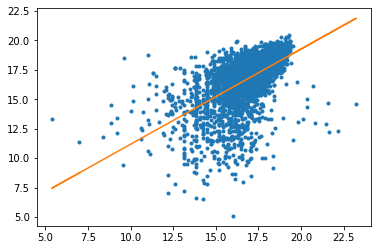

In [50]:
plt.plot(x,y,'.')
plt.plot(x,theta0 + theta1 * x)
plt.show()

### Question 3
The gradient descent algorithm can be improved.
- Implement the same gradient descent algorithm but with rescaled data
- Implement the algorithm with stochastic gradient descent (at each time step a data is randomly picked and the parameters are updated with this single data, N=1)
- Implement the algorithm with mini-batches (at each time step n<N data are randomly picked and the parameters are updated with this data)

t 999   J 0.011105755114314985 theta0, theta1 0.7905810741521873 0.6829206952180096


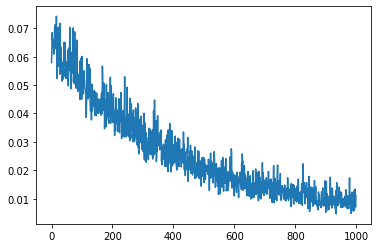

In [52]:
x_rescaled = (x - np.mean(x)) / np.std(x)
y_rescaled = (y - np.mean(y)) / np.std(y)

T = 1000  # number of steps
alpha = 0.1  # learning parameter
theta0 = 3.0  # initial value
theta1 = 1.0  # initial value
N = len(x)
n = 50 
Jtable = []

for t in range(T):
    J = 0
    dJ0 = 0
    dJ1 = 0
    indices = np.arange(N)
    np.random.shuffle(indices)
    indices = indices[:n]
    for j in range(n):
        i = indices[j]
        h_minus_y = theta0 + theta1 * x_rescaled[i] - y_rescaled[i]
        J += h_minus_y**2 / (2 * N)
        dJ0 += h_minus_y /N
        dJ1 += h_minus_y * x_rescaled[i] /N
    theta0 -= alpha * dJ0
    theta1 -= alpha * dJ1
    Jtable.append(J)
print('t', t, '  J', J,  'theta0, theta1', theta0, theta1)
plt.plot(Jtable)
plt.show()

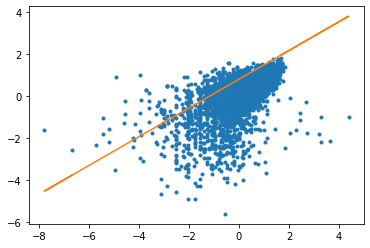

0.9629573377691154


In [53]:
plt.plot(x_rescaled,y_rescaled,'.')
plt.plot(x_rescaled,theta0 + theta1 * x_rescaled)
plt.show()
print(theta1 * np.std(y) / np.std(x))

In [54]:
Theta0 = theta0*np.std(y) + np.mean(y) - np.mean(x)*theta1*np.std(y)/np.std(x)
Theta1 = theta1*np.std(y)/np.std(x)
print(Theta0, Theta1)

2.136601288429681 0.9629573377691154


## Regression by direct method
The parameters $\theta_0$ and $\theta_1$ can also be obtained by the direct method

$\theta_1 = {\langle (x - \langle x \rangle) (y - \langle y \rangle)} \,/\, {\langle(x - \langle x \rangle)^2\rangle}$

$\theta_0 = \langle y \rangle - \theta_1 \langle x \rangle$

### Question 4
Complete the code below to calculate $\theta_0$ and $\theta_1$ directly.

In [29]:
xm = np.mean(x)
ym = np.mean(y)

t1 = np.mean((x - xm) * (y - ym)) / np.mean((x - xm)**2)
t0 = ym - t1 * xm

print(t0,t1)

3.479870650561214 0.78570145929595


### Question 5
Compare the different methods graphically and discuss why the results may be different. 